# Machine Learning Course (CS6140) Project
### Yu Swe Zin Aung, Xiaoyang Zhao, Zheng Zheng

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import drive
drive.mount('/content/drive')
import sys
FHA_Data = pd.read_excel("/content/drive/MyDrive/FHA_Data_New.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =FHA_Data.copy()

# Data Cleaning

## Data Dimention

In [ ]:
df.shape

(156182, 36)

## Data Frame Content

In [ ]:
df.head()

,ID,Identifier,Snapshot Year,Age Group,Gender,Tenure,Status,HoursPerPeriod,Work Type,Employee Type,...,Hours_E,Hours_F,Hours_G,EmployeeAssessment,DirectManagerAssessment,HasDependent,Dept,Compensation,Compensation_Change,FLIGHT
0,32018,3,2018,30-35,0,3,ACTIVE,0.0,CAS,CAS,...,93.5,0.0,0.0,NaN,NaN,NaN,310.71.2922012,357.368,16.616,0
1,32019,3,2019,30-35,0,4,ACTIVE,75.0,FT,REG,...,66.0,0.0,0.0,NaN,NaN,NaN,310.71.2101020,371.380,14.012,0
2,32020,3,2020,30-35,0,5,ACTIVE,75.0,FT,REG,...,33.0,0.0,0.0,NaN,NaN,NaN,310.71.2101020,380.928,9.548,0
3,32021,3,2021,30-35,0,6,ACTIVE,0.0,CAS,CAS,...,88.0,0.0,0.0,NaN,NaN,NaN,310.71.2101020,385.640,4.712,0
4,32022,3,2022,35-40,0,7,ACTIVE,0.0,CAS,CAS,...,0.0,0.0,0.0,NaN,NaN,NaN,310.71.2101020,385.640,0.000,0


## Deal with missing value

### Checke for missing value

In [ ]:
df.isnull().sum()

ID                              0
Identifier                      0
Snapshot Year                   0
Age Group                       0
Gender                          0
Tenure                          0
Status                          0
HoursPerPeriod                  0
Work Type                       0
Employee Type                   0
Designated Group                0
Union                           0
Site                          175
WorkCity                     6973
HomeCity                    53532
Staffing Group                170
Monitrend                     310
Job Family                    170
Program                       384
JobChange                   16623
Variable X                 154018
JobCodeGrade                    0
Hours_A                       102
Hours_B                       102
Hours_C                       102
Hours_D                       102
Hours_E                       102
Hours_F                       102
Hours_G                       102
EmployeeAssess

### Deal with Missing Value

Treat missing value in column - 'Has Dependent' and 'JobChange'
Fill the missing value wiht '0'

In [ ]:
df['JobChange']=df['JobChange'].fillna(0)

In [ ]:
df['HasDependent']=df['HasDependent'].fillna(0)

Drop the column with missing value percentage > 15%

In [ ]:
##Check Missing Data Percentage

# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values in each column
percentage_missing = (missing_values / len(df)) * 100

# Combine the results into a new DataFrame
missing_data_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage Missing': percentage_missing})

# Print the summary
print(missing_data_summary)


                         Missing Values  Percentage Missing
ID                                    0            0.000000
Identifier                            0            0.000000
Snapshot Year                         0            0.000000
Age Group                             0            0.000000
Gender                                0            0.000000
Tenure                                0            0.000000
Status                                0            0.000000
HoursPerPeriod                        0            0.000000
Work Type                             0            0.000000
Employee Type                         0            0.000000
Designated Group                      0            0.000000
Union                                 0            0.000000
Site                                175            0.112049
WorkCity                           6973            4.464663
HomeCity                          53532           34.275397
Staffing Group                      170 

In [ ]:
## Filter the columns with missing values greater than 15%
missing_columns = percentage_missing[percentage_missing > 15]

# Print the list of columns
print(missing_columns.index.tolist())

['HomeCity', 'Variable X', 'EmployeeAssessment', 'DirectManagerAssessment']


In [ ]:
##Drop the columns with missing values greater than 15%
#['HomeCity', 'Variable X', 'EmployeeAssessment', 'DirectManagerAssessment', 'HasDependent']

# Drop the columns
df=df.drop(columns=missing_columns.index)


In [ ]:
##Rearranging Table columns List
df.isnull().sum()

ID                        0
Identifier                0
Snapshot Year             0
Age Group                 0
Gender                    0
Tenure                    0
Status                    0
HoursPerPeriod            0
Work Type                 0
Employee Type             0
Designated Group          0
Union                     0
Site                    175
WorkCity               6973
Staffing Group          170
Monitrend               310
Job Family              170
Program                 384
JobChange                 0
JobCodeGrade              0
Hours_A                 102
Hours_B                 102
Hours_C                 102
Hours_D                 102
Hours_E                 102
Hours_F                 102
Hours_G                 102
HasDependent              0
Dept                      0
Compensation              0
Compensation_Change       0
FLIGHT                    0
dtype: int64

Solve missing value in column - 'Hours_A , B, C, D , E , F & G'

Set 0 for missing values in column (Hours_A , B, C, D , E , F & G)

In [ ]:
df['Hours_A']=df['Hours_A'].fillna(0)
df['Hours_B']=df['Hours_B'].fillna(0)
df['Hours_C']=df['Hours_C'].fillna(0)
df['Hours_D']=df['Hours_D'].fillna(0)
df['Hours_E']=df['Hours_E'].fillna(0)
df['Hours_F']=df['Hours_F'].fillna(0)
df['Hours_G']=df['Hours_G'].fillna(0)

Solve missing value in categorical columns - 'Site , WorkCity, Staffing Group, Monitered , Job Family , Program, JobCodeGrade'

Setting up [unknown] for missing values in these columns

In [ ]:
df['Site']=df['Site'].fillna('unknown')
df['WorkCity']=df['WorkCity'].fillna('unknown')
df['Staffing Group']=df['Staffing Group'].fillna('unknown')
df['Monitrend']=df['Monitrend'].fillna('unknown')
df['Job Family']=df['Job Family'].fillna('unknown')
df['Program']=df['Program'].fillna('unknown')
df['JobCodeGrade']=df['JobCodeGrade'].fillna('unknown')

### Check Again the Missing Data Percentage

In [ ]:
##Check Missing Data Percentage

# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values in each column
percentage_missing = (missing_values / len(df)) * 100

# Combine the results into a new DataFrame
missing_data_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage Missing': percentage_missing})

# Print the summary
print(missing_data_summary)

                     Missing Values  Percentage Missing
ID                                0                 0.0
Identifier                        0                 0.0
Snapshot Year                     0                 0.0
Age Group                         0                 0.0
Gender                            0                 0.0
Tenure                            0                 0.0
Status                            0                 0.0
HoursPerPeriod                    0                 0.0
Work Type                         0                 0.0
Employee Type                     0                 0.0
Designated Group                  0                 0.0
Union                             0                 0.0
Site                              0                 0.0
WorkCity                          0                 0.0
Staffing Group                    0                 0.0
Monitrend                         0                 0.0
Job Family                        0             

## Transfer the 'Average Age' column into **numeric**

In [ ]:
def getAgeMean(age):
    if not age or "-" not in age:
        return 0
    age_split = age.split("-")
    min_age = int(age_split[0])
    max_age = int(age_split[1])
    mean_age = (min_age + max_age) // 2
    return mean_age

In [ ]:
df['Ave_Age'] = df['Age Group'].apply(getAgeMean)
df.head()

,ID,Identifier,Snapshot Year,Age Group,Gender,Tenure,Status,HoursPerPeriod,Work Type,Employee Type,...,Hours_D,Hours_E,Hours_F,Hours_G,HasDependent,Dept,Compensation,Compensation_Change,FLIGHT,Ave_Age
0,32018,3,2018,30-35,0,3,ACTIVE,0.0,CAS,CAS,...,0.0,93.5,0.0,0.0,0.0,310.71.2922012,357.368,16.616,0,32
1,32019,3,2019,30-35,0,4,ACTIVE,75.0,FT,REG,...,0.0,66.0,0.0,0.0,0.0,310.71.2101020,371.380,14.012,0,32
2,32020,3,2020,30-35,0,5,ACTIVE,75.0,FT,REG,...,0.0,33.0,0.0,0.0,0.0,310.71.2101020,380.928,9.548,0,32
3,32021,3,2021,30-35,0,6,ACTIVE,0.0,CAS,CAS,...,0.0,88.0,0.0,0.0,0.0,310.71.2101020,385.640,4.712,0,32
4,32022,3,2022,35-40,0,7,ACTIVE,0.0,CAS,CAS,...,0.0,0.0,0.0,0.0,0.0,310.71.2101020,385.640,0.000,0,37


## Drp the duplicated columns.
Employee Type is Different grouping than Work Type, same info, we drop the column 'Employee Type'

In [ ]:
df=df.drop(columns='Employee Type')

Drop Status. Either Active or Leave represent for Flight 0. Term is same as Flight 1.

In [ ]:
df=df.drop(columns='Status')

## ***Solve the outliers

### Use Histogram and Boxplot to identify outliers

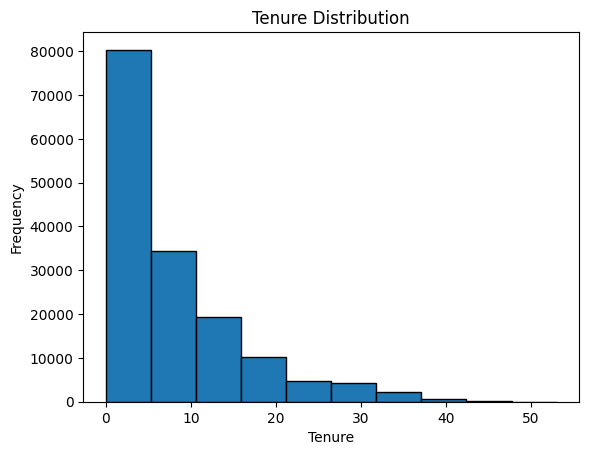

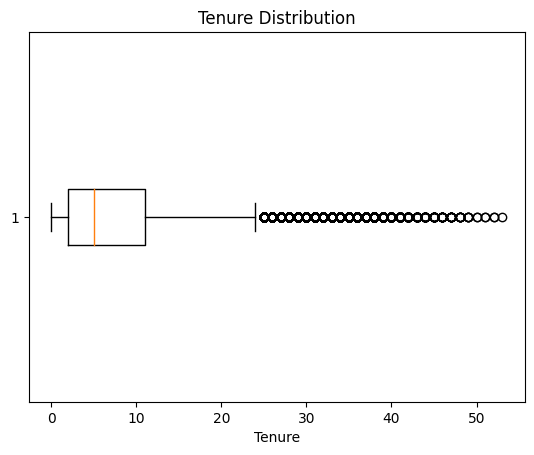

In [ ]:
import matplotlib.pyplot as plt

data =df['Tenure']

# Create a histogram
plt.hist(data, bins=10, edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Tenure Distribution')
plt.show()

# Create a boxplot
plt.boxplot(data, vert=False)
plt.xlabel('Tenure')
plt.title('Tenure Distribution')
plt.show()

In [ ]:
#To understand exactly which variables are outliers, need to establish a threshold.
#To do this, standardize the data. Hence, the data should have a mean of 1 and a standard deviation of 0.
# Calculate mean and standard deviation

data =df['Tenure']
mean = np.mean(data)
std_dev = np.std(data)

# Standardize the data
standardized_data = [(x - mean) / std_dev for x in data]

print('Outer range (low) of the distribution:')
print(sorted(standardized_data)[:10])

print('Outer range (high) of the distribution:')
print(sorted(standardized_data)[-10:])

Outer range (low) of the distribution:
[-0.9578099844428725, -0.9578099844428725, -0.9578099844428725, -0.9578099844428725, -0.9578099844428725, -0.9578099844428725, -0.9578099844428725, -0.9578099844428725, -0.9578099844428725, -0.9578099844428725]
Outer range (high) of the distribution:
[5.148771565889138, 5.148771565889138, 5.148771565889138, 5.2733956791612195, 5.2733956791612195, 5.398019792433302, 5.398019792433302, 5.522643905705383, 5.522643905705383, 5.647268018977465]


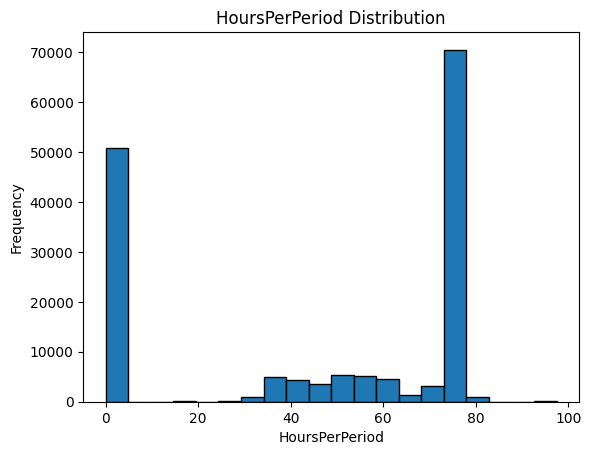

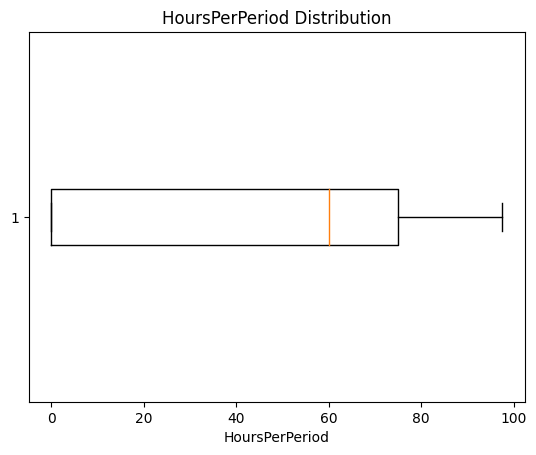

In [ ]:
data =df['HoursPerPeriod']

# Create a histogram
plt.hist(data, bins=20, edgecolor='black')
plt.xlabel('HoursPerPeriod')
plt.ylabel('Frequency')
plt.title('HoursPerPeriod Distribution')
plt.show()

# Create a boxplot
plt.boxplot(data, vert=False)
plt.xlabel('HoursPerPeriod')
plt.title('HoursPerPeriod Distribution')
plt.show()

In [ ]:
data =df['HoursPerPeriod']
mean = np.mean(data)
std_dev = np.std(data)

# Standardize the data
standardized_data = [(x - mean) / std_dev for x in data]

print('Outer range (low) of the distribution:')
print(sorted(standardized_data)[:10])

print('Outer range (high) of the distribution:')
print(sorted(standardized_data)[-10:])

Outer range (low) of the distribution:
[-1.3639377113657778, -1.3639377113657778, -1.3639377113657778, -1.3639377113657778, -1.3639377113657778, -1.3639377113657778, -1.3639377113657778, -1.3639377113657778, -1.3639377113657778, -1.3639377113657778]
Outer range (high) of the distribution:
[1.5671362144227596, 1.5671362144227596, 1.5671362144227596, 1.5671362144227596, 1.5671362144227596, 1.5671362144227596, 1.5671362144227596, 1.5671362144227596, 1.5671362144227596, 1.5671362144227596]


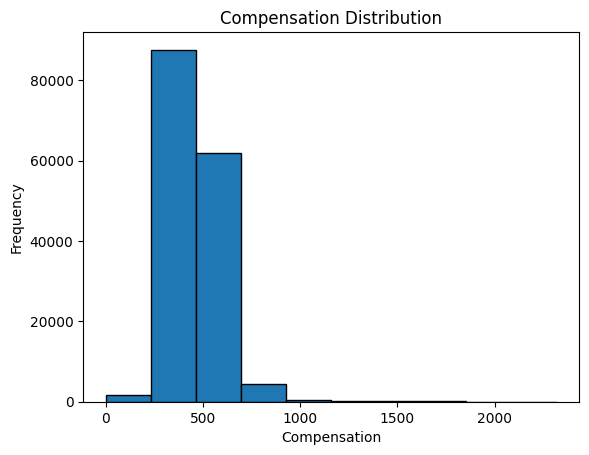

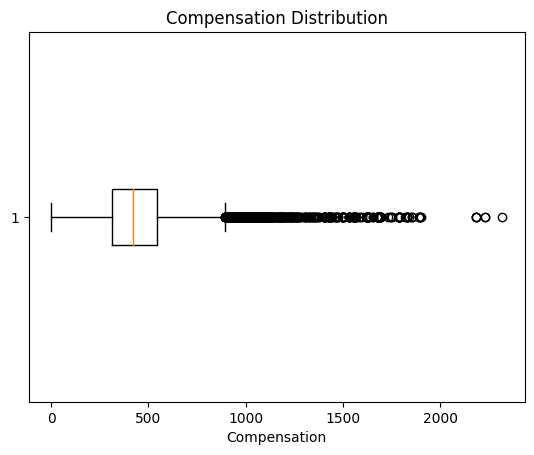

In [ ]:
data =df['Compensation']

# Create a histogram
plt.hist(data, bins=10, edgecolor='black')
plt.xlabel('Compensation')
plt.ylabel('Frequency')
plt.title('Compensation Distribution')
plt.show()

# Create a boxplot
plt.boxplot(data, vert=False)
plt.xlabel('Compensation')
plt.title('Compensation Distribution')
plt.show()

In [ ]:
data =df['Compensation']
mean = np.mean(data)
std_dev = np.std(data)

# Standardize the data
standardized_data = [(x - mean) / std_dev for x in data]

print('Outer range (low) of the distribution:')
print(sorted(standardized_data)[:10])

print('Outer range (high) of the distribution:')
print(sorted(standardized_data)[-10:])

#I cannot consider that all of them are outliers, but I have to be careful with the last  variables that are above 2000.

Outer range (low) of the distribution:
[-3.0621950011543224, -3.0621950011543224, -3.0621950011543224, -3.0621950011543224, -3.0621950011543224, -3.0621950011543224, -3.0621950011543224, -3.0621950011543224, -3.0621950011543224, -2.678156609804626]
Outer range (high) of the distribution:
[10.217173320141645, 10.245910886841283, 10.245910886841283, 10.30599852630416, 12.28627812251552, 12.28627812251552, 12.28627812251552, 12.593683002666186, 12.593683002666186, 13.219813622576462]


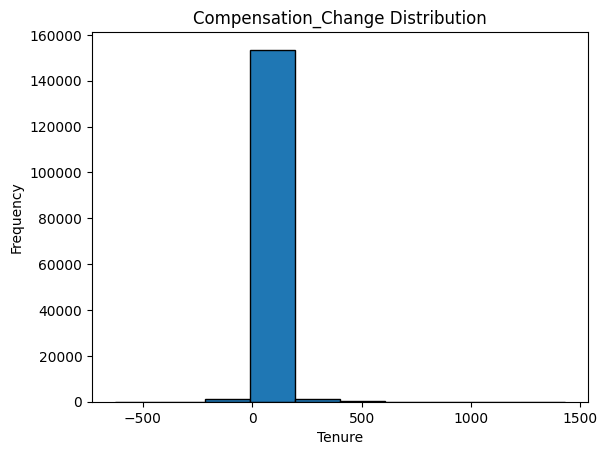

In [ ]:
data =df['Compensation_Change']

# Create a histogram
plt.hist(data, bins=10, edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Compensation_Change Distribution')
plt.show()


In [ ]:
data =df['Compensation_Change']
mean = np.mean(data)
std_dev = np.std(data)

# Standardize the data
standardized_data = [(x - mean) / std_dev for x in data]

print('Outer range (low) of the distribution:')
print(sorted(standardized_data)[:10])

print('Outer range (high) of the distribution:')
print(sorted(standardized_data)[-20:])

#I cannot consider that all of them are outliers, but I have to be careful with the last  variables that are above 15.

Outer range (low) of the distribution:
[-16.242257591873223, -15.217016079662866, -13.213276589233507, -11.595950313132672, -11.39339499917014, -11.069306496830087, -10.910378481259485, -10.90726224566006, -10.807542706478506, -10.80131023527966]
Outer range (high) of the distribution:
[17.562666190673724, 17.615642195863924, 17.631223373861044, 17.668618201054127, 17.765221504636255, 18.120472362970542, 18.145402247765933, 18.285632849739994, 18.68139477086679, 18.840322786437387, 19.4760348487198, 20.370394465754366, 21.07154747562467, 21.53275034433936, 21.86618755347768, 22.025115569048285, 23.05970578805691, 25.599437801587126, 27.272856318477587, 35.56827548414314]


### Scatter Plots

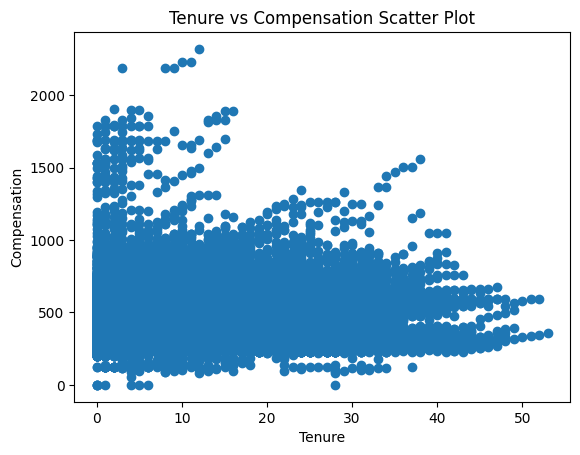

In [ ]:
import matplotlib.pyplot as plt

# Data
Tenure =df['Tenure']
Compensation=df['Compensation']
# Scatter plot
plt.scatter(Tenure, Compensation)
plt.xlabel('Tenure')
plt.ylabel('Compensation')
plt.title('Tenure vs Compensation Scatter Plot')
plt.show()

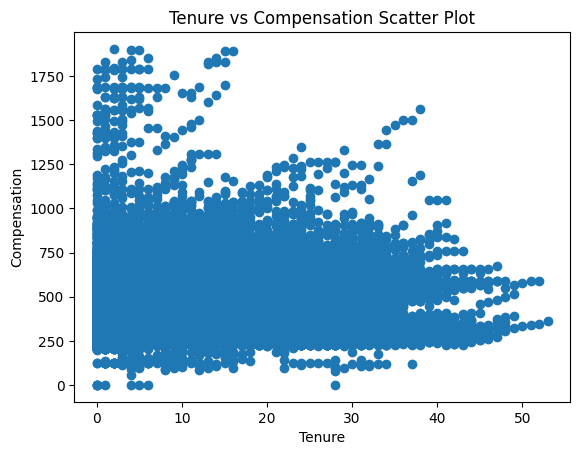

In [ ]:
#Compensation > 2000 are outliners . Delete those data point

df = df.drop(df[df.Compensation > 2000].index)

#Regenerate the scatter plot
# Data
Tenure =df['Tenure']
Compensation=df['Compensation']
# Scatter plot
plt.scatter(Tenure, Compensation)
plt.xlabel('Tenure')
plt.ylabel('Compensation')
plt.title('Tenure vs Compensation Scatter Plot')
plt.show()

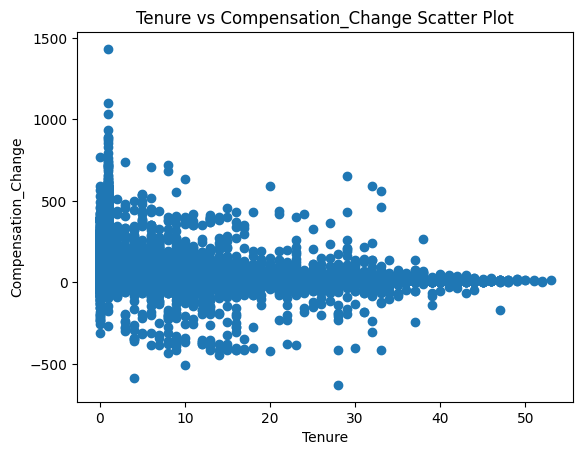

In [ ]:

# Data
Tenure =df['Tenure']
Compensation_Change=df['Compensation_Change']
# Scatter plot
plt.scatter(Tenure, Compensation_Change)
plt.xlabel('Tenure')
plt.ylabel('Compensation_Change')
plt.title('Tenure vs Compensation_Change Scatter Plot')
plt.show()

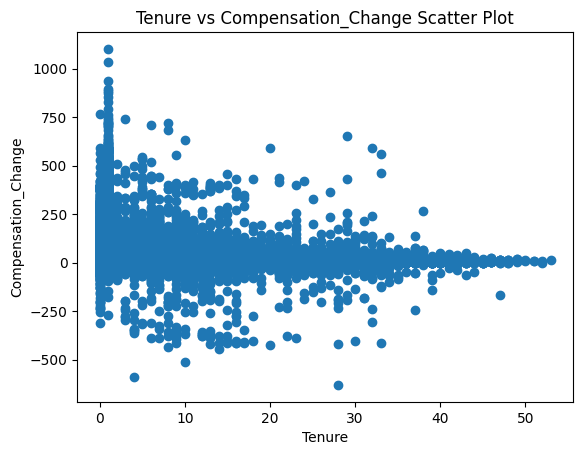

In [ ]:
#Compensation_Change > 1400 are outliners . Delete those data point

df = df.drop(df[df.Compensation_Change > 1400].index)

# Data
Tenure =df['Tenure']
Compensation_Change=df['Compensation_Change']
# Scatter plot
plt.scatter(Tenure, Compensation_Change)
plt.xlabel('Tenure')
plt.ylabel('Compensation_Change')
plt.title('Tenure vs Compensation_Change Scatter Plot')
plt.show()

***Encode value 0,1 for columns =>  Work Type

In [ ]:
def mapWorkType(workType):
    if workType == "FT":
        return 0
    if workType == "PT":
        return 1
    return 3

In [ ]:
df['Work Type'] = df['Work Type'].apply(mapWorkType)
df[:5]['Work Type']

0    3
1    0
2    0
3    3
4    3
Name: Work Type, dtype: int64

In [ ]:
#df2.to_excel("output.xlsx",
            # sheet_name="Sheet_name_1")

# Data Exploratory Analysis

## Overview of datatypes

In [ ]:
df.dtypes

ID                       int64
Identifier               int64
Snapshot Year            int64
Age Group               object
Gender                   int64
Tenure                   int64
HoursPerPeriod         float64
Work Type                int64
Designated Group        object
Union                   object
Site                    object
WorkCity                object
Staffing Group          object
Monitrend               object
Job Family              object
Program                 object
JobChange              float64
JobCodeGrade            object
Hours_A                float64
Hours_B                float64
Hours_C                float64
Hours_D                float64
Hours_E                float64
Hours_F                float64
Hours_G                float64
HasDependent           float64
Dept                    object
Compensation           float64
Compensation_Change    float64
FLIGHT                   int64
Ave_Age                  int64
dtype: object

### Show specific types of data

In [ ]:
df.select_dtypes(include=['number'])

,ID,Identifier,Snapshot Year,Gender,Tenure,HoursPerPeriod,Work Type,JobChange,Hours_A,Hours_B,Hours_C,Hours_D,Hours_E,Hours_F,Hours_G,HasDependent,Compensation,Compensation_Change,FLIGHT,Ave_Age
0,32018,3,2018,0,3,0.0,3,0.0,346.00,0.00,0.0,0.0,93.5,0.0,0.0,0.0,357.368,16.616,0,32
1,32019,3,2019,0,4,75.0,0,0.0,682.00,8.42,33.0,0.0,66.0,0.0,0.0,0.0,371.380,14.012,0,32
2,32020,3,2020,0,5,75.0,0,0.0,512.50,19.92,88.0,0.0,33.0,0.0,0.0,0.0,380.928,9.548,0,32
3,32021,3,2021,0,6,0.0,3,0.0,781.00,57.42,66.0,0.0,88.0,0.0,0.0,0.0,385.640,4.712,0,32
4,32022,3,2022,0,7,0.0,3,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,385.640,0.000,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156177,501002022,50100,2022,0,1,0.0,3,0.0,1213.31,5.50,0.0,0.0,0.0,0.0,0.5,0.0,288.548,0.000,0,42
156178,501012021,50101,2021,0,0,0.0,3,0.0,209.75,0.00,0.0,0.0,0.0,0.0,0.0,0.0,288.548,0.000,0,32
156179,501012022,50101,2022,0,1,0.0,3,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,288.548,0.000,0,32
156180,501022021,50102,2021,0,0,0.0,3,0.0,396.83,2.50,0.0,0.0,15.0,0.0,0.0,0.0,396.676,0.000,0,27


In [ ]:
df.select_dtypes(include=['object'])

,Age Group,Designated Group,Union,Site,WorkCity,Staffing Group,Monitrend,Job Family,Program,JobCodeGrade,Dept
0,30-35,N,B,MMH,Mission,LPNs - UPP,N_LPNDIREC,NBA - LPNs,RESIDENTIAL O & O,NLPN1,310.71.2922012
1,30-35,N,B,MMH,Mission,LPNs - UPP,N_LPNDIREC,NBA - LPNs,PATH,NLPN1,310.71.2101020
2,30-35,N,B,MMH,Mission,LPNs - UPP,N_LPNDIREC,NBA - LPNs,PATH,NLPN1,310.71.2101020
3,30-35,N,B,MMH,Mission,LPNs - UPP,N_LPNDIREC,NBA - LPNs,PATH,NLPN1,310.71.2101020
4,35-40,N,B,MMH,Mission,LPNs - UPP,N_LPNDIREC,NBA - LPNs,PATH,NLPN1,310.71.2101020
...,...,...,...,...,...,...,...,...,...,...,...
156177,40-45,C,G,SRY HS NWT,Surrey,CAide/HomeSpt - UPP,C_DIRECT,Client Services - Community Health Worker,HOME HEALTH,CS21,402.71.5351011
156178,30-35,C,G,SRY HH CTL,unknown,CAide/HomeSpt - UPP,C_DIRECT,Client Services - Community Health Worker,HOME HEALTH,CS21,402.71.5351011
156179,30-35,C,G,SRY HS NWT,Surrey,CAide/HomeSpt - UPP,C_DIRECT,Client Services - Community Health Worker,HOME HEALTH,CS21,402.71.5351011
156180,25-30,P,H,SMH,Surrey,HSP - Therapists - UPP,P_DIRECT,Psychology/Counselling Services - Social Worker,OTHER CLINICAL SUPPORT,P08,307.71.4700000


## Questions

### What is Fraser Healthy?


The Fraser Health Authority (FHA) is one of five publicly funded health authorities[3] into which the Canadian province of British Columbia (BC) is divided.

It has 29,000 employees and serves the region from Boston Bar in the Fraser Canyon down the Fraser River Valley to the Vancouver suburbs of Burnaby and Delta.

Facilities and services

Services provided by Fraser Health include primary health care, community home care, mental health and addictions, acute medical, and surgical services.

Fraser Health has 13 acute-care hospitals including 3 regional hospitals and 9 community hospitals as well as an outpatient care and surgery centre.

*(From Wikipedia) *

### Overview of Fraser Healthy based on current dataset

In [ ]:
# importing pandas library
import pandas as pd
# import matplotlib library
import matplotlib.pyplot as plt

new_df = df[(df['FLIGHT'] == 0) & (df['Snapshot Year'] == 2022)&(df['WorkCity'] != 'unknown')]
Covered_City = new_df['WorkCity'].nunique()
Institution_Number = new_df['Site'].nunique()

print('By 2022, the Fraser Health covers ' + str(new_df['WorkCity'].nunique()) + ' cities')
print('By 2022, the Fraser Health has ' + str(new_df['Site'].nunique()) + ' institutions')

By 2022, the Fraser Health covers 25 cities
By 2022, the Fraser Health has 142 institutions


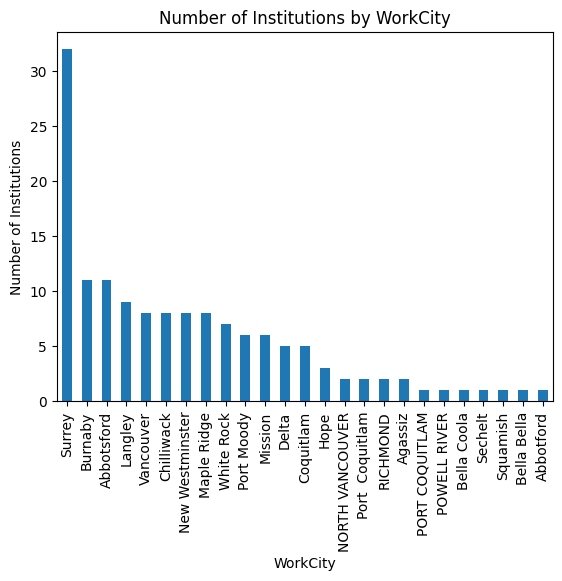

Most of the institution are located in Surrey


In [ ]:
grouped_df = df[(df['FLIGHT'] == 0) & (df['Snapshot Year'] == 2022)&(df['WorkCity'] != 'unknown')].groupby('WorkCity')['Site'].nunique()
grouped_df = grouped_df.sort_values(ascending=False)
# creating the bar chart
grouped_df.plot(kind='bar')

# setting labels and title
plt.xlabel('WorkCity')
plt.ylabel('Number of Institutions')
plt.title('Number of Institutions by WorkCity')
plt.show()

print('Most of the institution are located in Surrey')

In [ ]:
new_df = df[(df['FLIGHT'] == 0) & (df['Snapshot Year'] == 2022)&(df['WorkCity'] != 'unknown')]
Covered_City = new_df['WorkCity'].count()

print('By 2022, the Fraser Health has ' + str(new_df['FLIGHT'].count()) + ' employees')

By 2022, the Fraser Health has 31917 employees


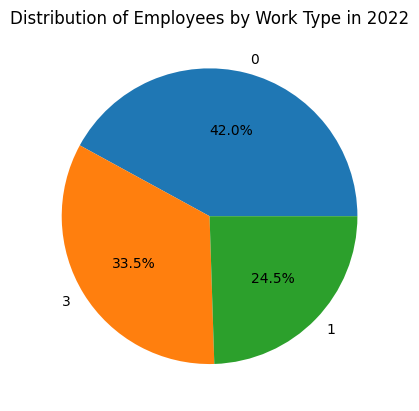

In [ ]:
# import matplotlib library
import matplotlib.pyplot as plt

grouped_df = df[(df['FLIGHT'] == 0) & (df['Snapshot Year'] == 2022)].groupby('Work Type')['FLIGHT'].count()
grouped_df = grouped_df.sort_values(ascending=False)

# creating the pie chart
grouped_df.plot(kind='pie', autopct='%1.1f%%')

# setting title
plt.title('Distribution of Employees by Work Type in 2022')

# Hide y-label
plt.ylabel('')

plt.show()


As we can see from the pine chart, by 2022, 42% of the employees were Full time employees in Surrey, while 33.5% and 24.5% of them were casual and part-time employees.


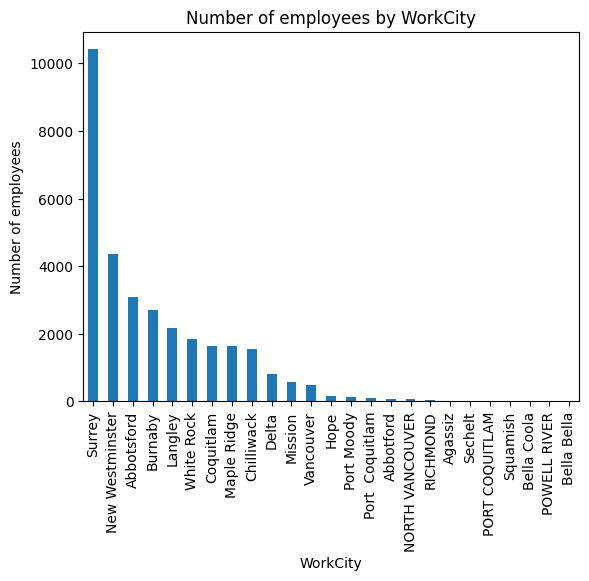

Most of the employees are located in Surrey


In [ ]:
grouped_df = df[(df['FLIGHT'] == 0) & (df['Snapshot Year'] == 2022)&(df['WorkCity'] != 'unknown')].groupby('WorkCity')['FLIGHT'].count()
grouped_df = grouped_df.sort_values(ascending=False)
# creating the bar chart
grouped_df.plot(kind='bar')

# setting labels and title
plt.xlabel('WorkCity')
plt.ylabel('Number of employees')
plt.title('Number of employees by WorkCity')
plt.show()

print('Most of the employees are located in Surrey')

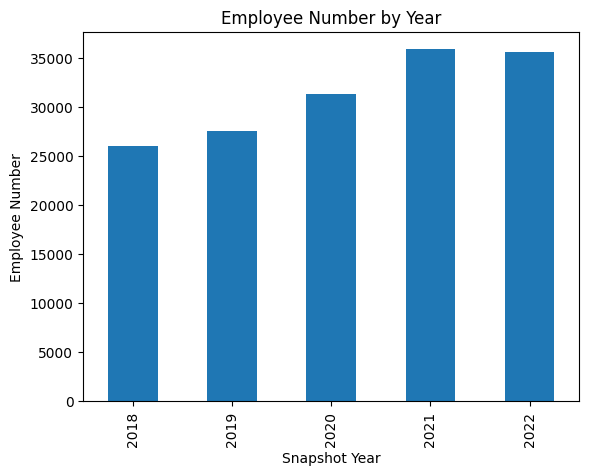

In [ ]:
# importing pandas library
import pandas as pd
# import matplotlib library
import matplotlib.pyplot as plt

# grouping by 'Snapshot Year' and getting the sum of 'FLIGHT' values within each group
grouped_df = df.groupby('Snapshot Year')['FLIGHT'].count()

# creating the bar chart
grouped_df.plot(kind='bar')

# setting labels and title
plt.xlabel('Snapshot Year')
plt.ylabel('Employee Number')
plt.title('Employee Number by Year')

plt.show()

As we can see from the bar chart, during 2018-2021 experienced an expanding period.
And the scale get stable since 2021.

###Conditonal Selection

Is the target lossing condition is getting worse or better?

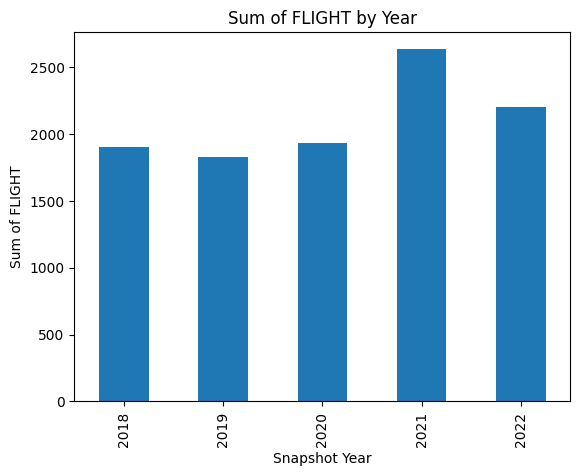

In [ ]:
# importing pandas library
import pandas as pd
# import matplotlib library
import matplotlib.pyplot as plt

# grouping by 'Snapshot Year' and getting the sum of 'FLIGHT' values within each group
grouped_df = df.groupby('Snapshot Year')['FLIGHT'].sum()

# creating the bar chart
grouped_df.plot(kind='bar')

# setting labels and title
plt.xlabel('Snapshot Year')
plt.ylabel('Sum of FLIGHT')
plt.title('Sum of FLIGHT by Year')

plt.show()

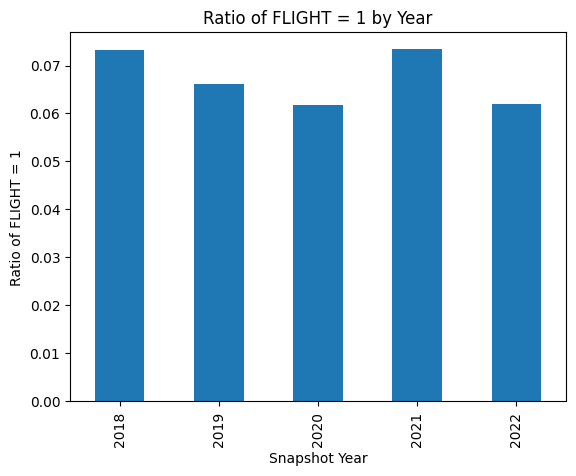

In [ ]:
# grouping by 'Snapshot Year' and getting the mean of 'FLIGHT' values within each group
grouped_df = df.groupby('Snapshot Year')['FLIGHT'].mean()

# creating the bar chart
grouped_df.plot(kind='bar')

# setting labels and title
plt.xlabel('Snapshot Year')
plt.ylabel('Ratio of FLIGHT = 1')
plt.title('Ratio of FLIGHT = 1 by Year')

plt.show()

Generally the turnover rate is stable in betwen 0.06 to 0.075.

Gender
The gender allocation and the relationship with the turn over rate

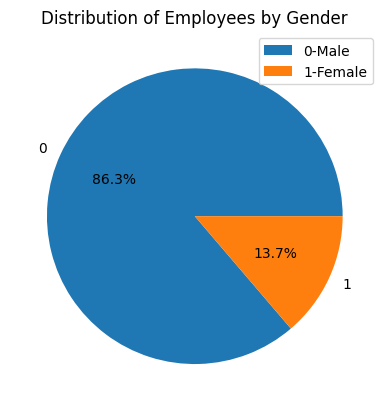

In [ ]:
# import matplotlib library
import matplotlib.pyplot as plt

grouped_df = df[(df['FLIGHT'] == 0)].groupby('Gender')['FLIGHT'].count()
grouped_df = grouped_df.sort_values(ascending=False)

# creating the pie chart
grouped_df.plot(kind='pie', autopct='%1.1f%%')

# setting title
plt.title('Distribution of Employees by Gender')

# Hide y-label
plt.ylabel('')
plt.legend(['0-Male', '1-Female'])
plt.show()

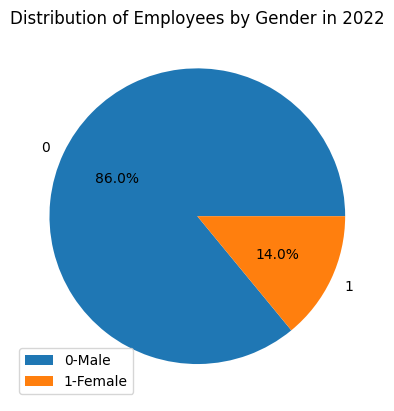

In [ ]:
# import matplotlib library
import matplotlib.pyplot as plt

grouped_df = df[(df['FLIGHT'] == 0) & (df['Snapshot Year'] == 2022)].groupby('Gender')['FLIGHT'].count()
grouped_df = grouped_df.sort_values(ascending=False)

# creating the pie chart
grouped_df.plot(kind='pie', autopct='%1.1f%%')

# setting title
plt.title('Distribution of Employees by Gender in 2022')

# Hide y-label
plt.ylabel('')
plt.legend(['0-Male', '1-Female'])
plt.show()

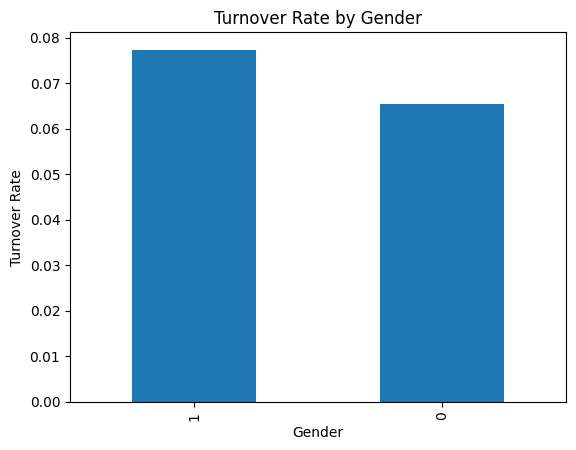

Gender
1    0.077313
0    0.065486
Name: FLIGHT, dtype: float64


In [ ]:
# grouping by 'Gender' and getting the mean of 'FLIGHT' values within each group
grouped_df = df.groupby('Gender')['FLIGHT'].mean()

# sort the values in descending order
grouped_df = grouped_df.sort_values(ascending=False)

# creating the bar chart
grouped_df.plot(kind='bar')

# setting labels and title
plt.xlabel('Gender')
plt.ylabel('Turnover Rate')
plt.title('Turnover Rate by Gender')
plt.show()

print(grouped_df)

The male employees in Fraser Health accounts for 86.3% whicle female employees for 13.7% in 2022.

The turnover rate for male employee(7.7%) is slightly higher than that for female employees(6.5%).


Tenure year
In which tenure year is the likelihood of employees leaving the company the highest (for the first 10 years)?

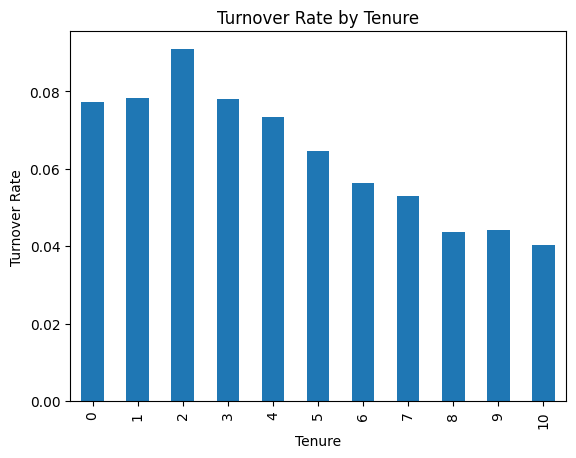

In [ ]:
# grouping by 'Work Type' and getting the mean of 'FLIGHT' values within each group
grouped_df = df[df['Tenure'] <= 10].groupby('Tenure')['FLIGHT'].mean()

# creating the bar chart
grouped_df.plot(kind='bar')

# setting labels and title
plt.xlabel('Tenure')
plt.ylabel('Turnover Rate')
plt.title('Turnover Rate by Tenure')

plt.show()

According to bar chart above, in the third year, employees has the highest possiblity to leave the company.

In [ ]:
'''
# grouping by 'Work Type' and getting the mean of 'FLIGHT' values within each group
grouped_df = df[(df['Tenure'] <= 10) & (df['Work Type'] == 'FT')].groupby('Tenure')['FLIGHT'].mean()

# creating the bar chart
grouped_df.plot(kind='bar')

# setting labels and title
plt.xlabel('Tenure')
plt.ylabel('Turnover Rate')
plt.title('Full-time Employee Turnover Rate by Tenure')

plt.show()
'''



"\n# grouping by 'Work Type' and getting the mean of 'FLIGHT' values within each group\ngrouped_df = df[(df['Tenure'] <= 10) & (df['Work Type'] == 'FT')].groupby('Tenure')['FLIGHT'].mean()\n\n# creating the bar chart\ngrouped_df.plot(kind='bar')\n\n# setting labels and title\nplt.xlabel('Tenure')\nplt.ylabel('Turnover Rate')\nplt.title('Full-time Employee Turnover Rate by Tenure')\n\nplt.show()\n"

According to bar chart above, in the second year, full-time employees has the highest possiblity to leave the company.

Hours Per Period

Work Type
0    74.999318
1    53.388870
3     0.066655
Name: HoursPerPeriod, dtype: float64


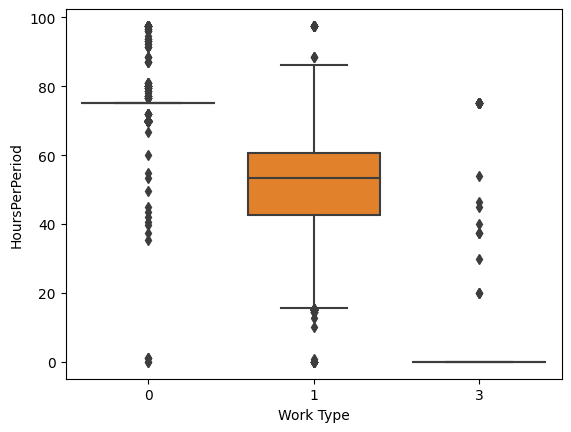

In [ ]:
import seaborn as sns
sns.boxplot(x='Work Type', y='HoursPerPeriod', data = df)

grouped_df = df.groupby('Work Type')['HoursPerPeriod'].mean()
print(grouped_df)

Most of the casual employeers's dcontracted biweekly hours is 0, while that for full-time and part-time employeers is 75 and 53.

Work Type
Which work type has the highest turnonver rate?

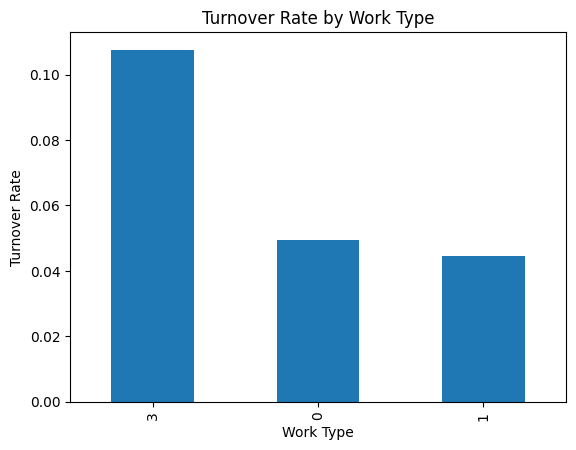

In [ ]:
# grouping by 'Work Type' and getting the mean of 'FLIGHT' values within each group
grouped_df = df.groupby('Work Type')['FLIGHT'].mean()

# sort the values in descending order
grouped_df = grouped_df.sort_values(ascending=False)

# creating the bar chart
grouped_df.plot(kind='bar')

# setting labels and title
plt.xlabel('Work Type')
plt.ylabel('Turnover Rate')
plt.title('Turnover Rate by Work Type')

plt.show()

According to bar chart above, the Casual employees got the highest turnover rate, which is close to 11%, while the Fulltime employees and part-time employees got much smaller turnover rate.

City
Which City has the highest turn over rate?

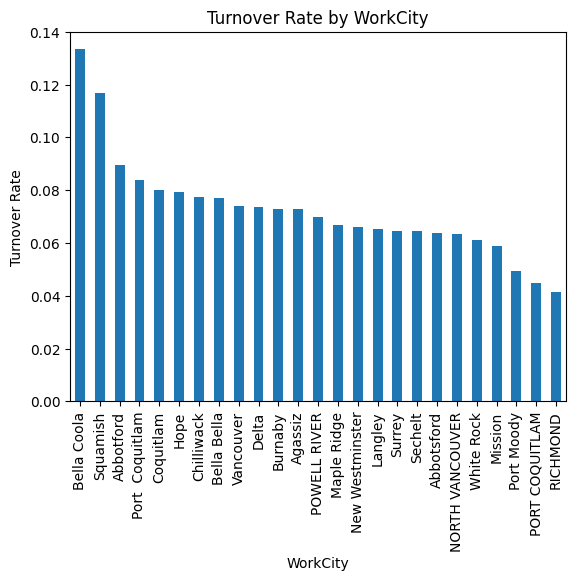

In [ ]:
# grouping by 'WorkCity' and getting the mean of 'FLIGHT' values within each group
grouped_df = df[df['WorkCity'] != 'unknown'].groupby('WorkCity')['FLIGHT'].mean()

# sort the values in descending order
grouped_df = grouped_df.sort_values(ascending=False)

# creating the bar chart
grouped_df.plot(kind='bar')

# setting labels and title
plt.xlabel('WorkCity')
plt.ylabel('Turnover Rate')
plt.title('Turnover Rate by WorkCity')

plt.show()

According to the bar chart above, the turnover rate in Bella Coola and Suanmish are both much higher than average rate. Combining with the insutition and employee allocation anaysis above, there is only a few insitution and employ in these two cities, we believe the high turn over rate in these two cities won't influence the total cost for the whole company.

Job Change

JobChange
0.0    34704
1.0     7913
2.0     1632
3.0      340
4.0       46
5.0        3
Name: Identifier, dtype: int64
JobChange
0.0    0.260460
1.0    0.153924
2.0    0.123162
3.0    0.061765
4.0    0.108696
5.0    0.000000
Name: FLIGHT, dtype: float64


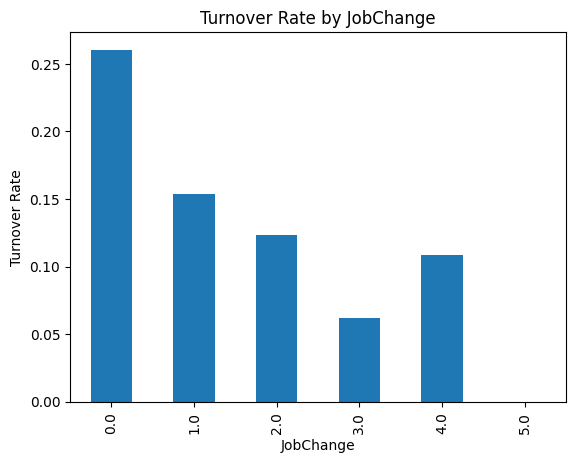

In [ ]:
# grouping by 'WorkCity' and getting the mean of 'FLIGHT' values within each group
grouped_df = df.groupby('Identifier').agg({'JobChange': 'sum', 'FLIGHT': 'sum'}).reset_index()
grouped_df_1 = grouped_df.groupby('JobChange')['Identifier'].count()
print(grouped_df_1)

grouped_df_2 = grouped_df.groupby('JobChange')['FLIGHT'].mean()
print(grouped_df_2)

# creating the bar chart
grouped_df_2.plot(kind='bar')

# setting labels and title
plt.xlabel('JobChange')
plt.ylabel('Turnover Rate')
plt.title('Turnover Rate by JobChange')

plt.show()

According the barchart above, it's obvious that the more changes to the job, the lower the turn-over rate.

Hours A to G

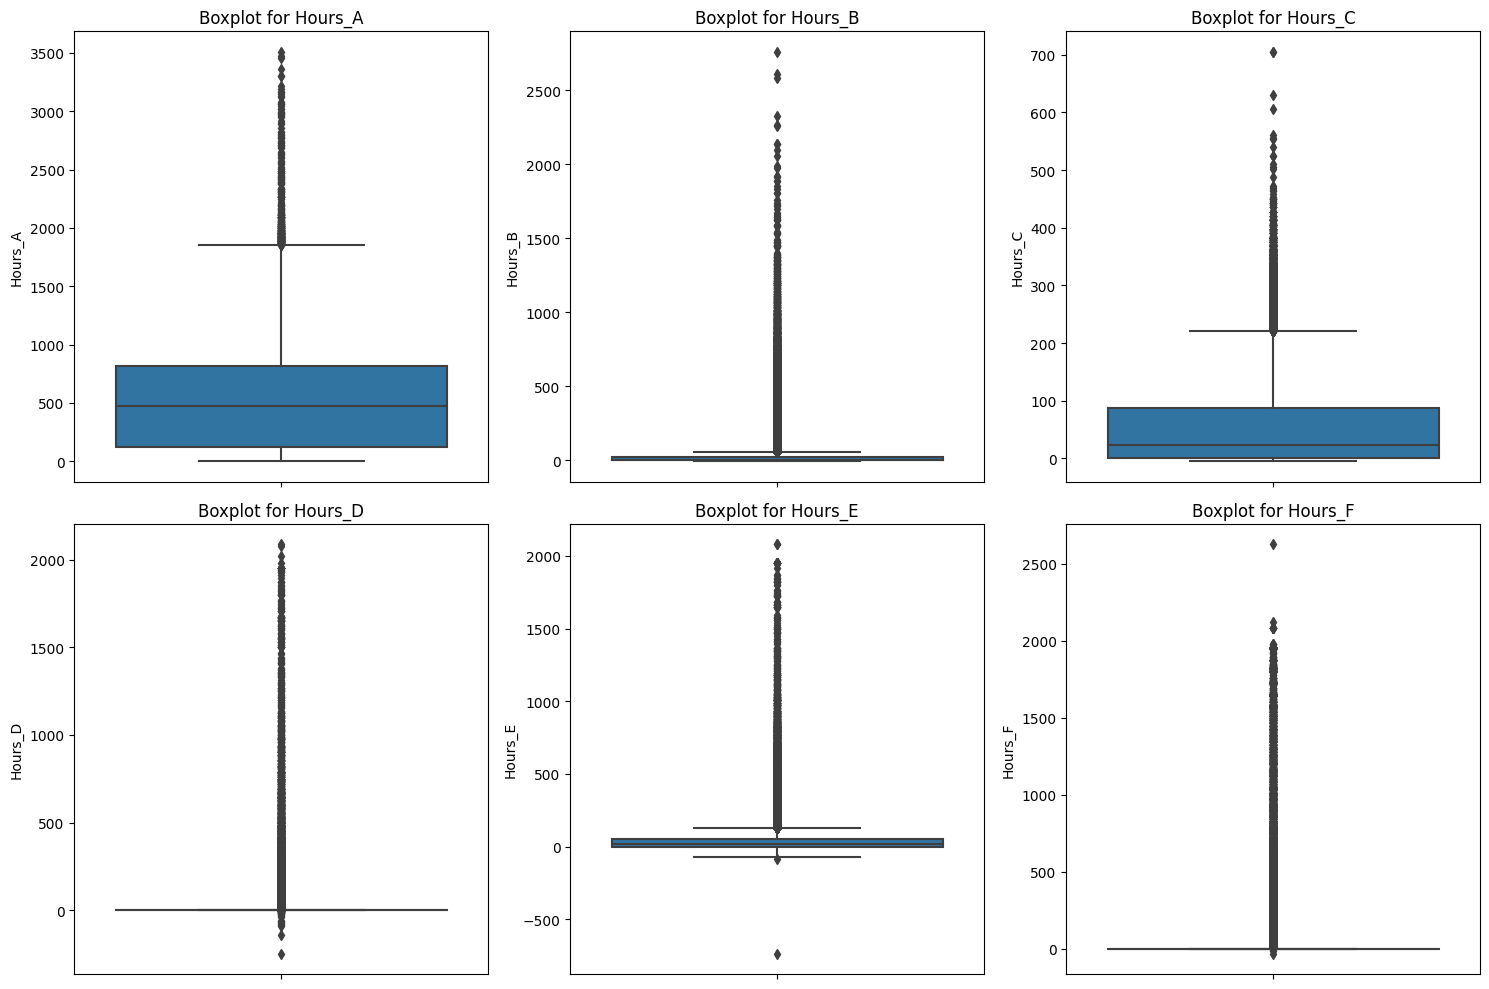

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the 'Hours_A' to 'Hours_G' columns and other necessary data.

# Create a Figure and Axes for the subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Create boxplots for 'Hours_A' to 'Hours_G' variables
sns.boxplot(y='Hours_A', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot for Hours_A')

sns.boxplot(y='Hours_B', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot for Hours_B')

sns.boxplot(y='Hours_C', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Boxplot for Hours_C')

sns.boxplot(y='Hours_D', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot for Hours_D')

sns.boxplot(y='Hours_E', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot for Hours_E')

sns.boxplot(y='Hours_F', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Boxplot for Hours_F')

# Remove empty subplots and adjust layout
fig.tight_layout()

# Display the plot
plt.show()

Compensation and Compensation_change

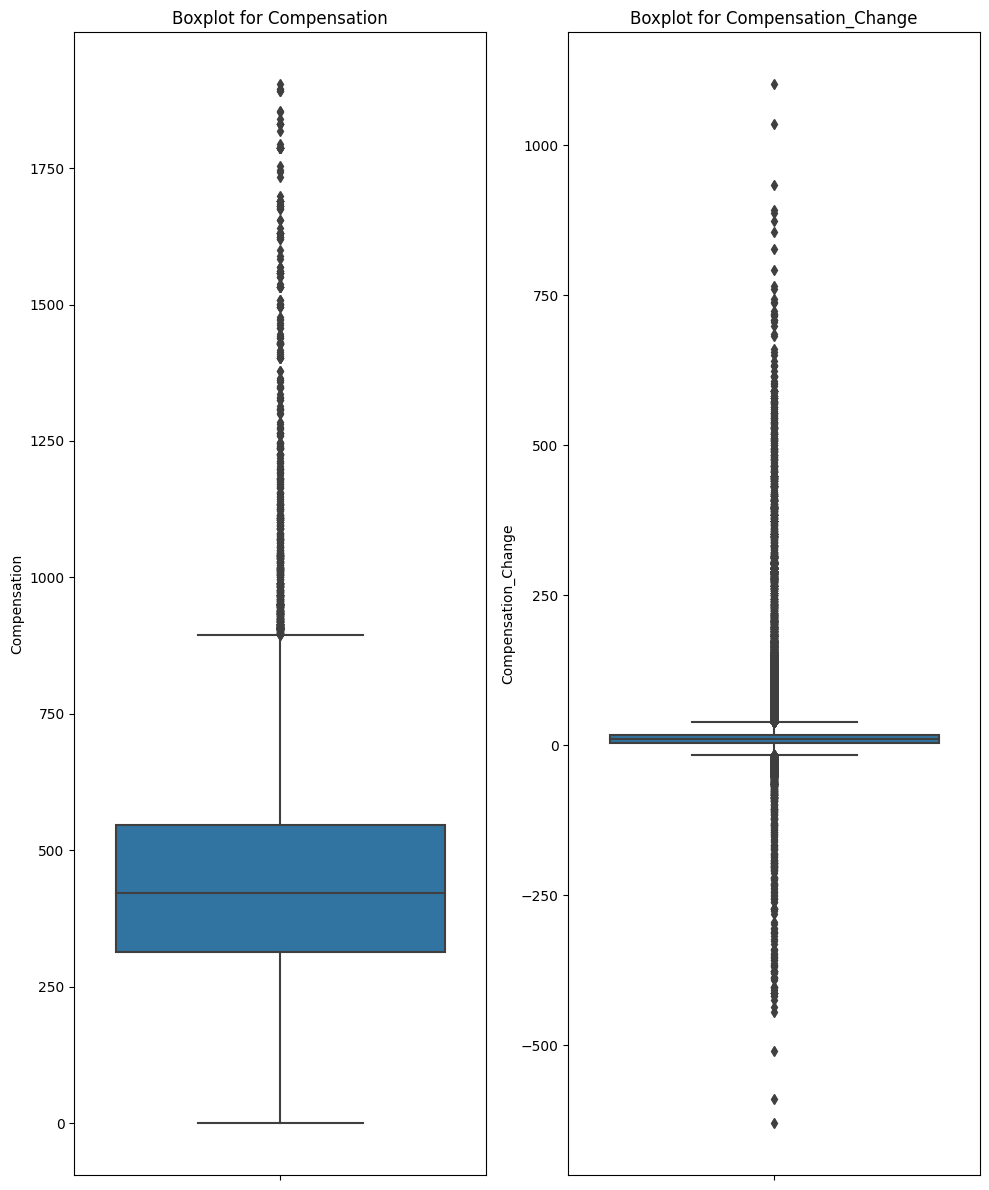

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the 'Compensation' and 'Compensation_Change' columns and other necessary data.

# Create a Figure and Axes for the subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 12))

# Create boxplot for 'Compensation' variable
sns.boxplot(y='Compensation', data=df, ax=axes[0])
axes[0].set_title('Boxplot for Compensation')

# Create boxplot for 'Compensation_Change' variable
sns.boxplot(y='Compensation_Change', data=df, ax=axes[1])
axes[1].set_title('Boxplot for Compensation_Change')

# Adjust layout and spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

### Heatmap Coefficient Graph for numeric variables

In [ ]:
df_new = df.drop(['ID', 'Identifier','Snapshot Year'], axis=1)
corr = df_new.corr()
corr

<ipython-input-58-3bef6c9d9c23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_new.corr()


,Gender,Tenure,HoursPerPeriod,Work Type,JobChange,Hours_A,Hours_B,Hours_C,Hours_D,Hours_E,Hours_F,Hours_G,HasDependent,Compensation,Compensation_Change,FLIGHT,Ave_Age
Gender,1.000000,-0.059869,0.052667,-0.053657,0.016318,0.057617,0.014484,0.033400,-0.010757,-0.027314,-0.030724,-0.018300,0.014946,0.057133,0.017358,0.016348,-0.005605
Tenure,-0.059869,1.000000,0.277098,-0.292697,-0.057446,0.038650,0.017287,0.368744,0.016404,0.093464,0.241921,0.046417,-0.040819,0.191581,-0.083597,-0.003009,0.536863
HoursPerPeriod,0.052667,0.277098,1.000000,-0.979082,0.065752,0.430578,0.160965,0.522264,0.081252,0.211825,0.127686,0.118373,0.101667,0.236004,0.074182,-0.103268,0.158235
Work Type,-0.053657,-0.292697,-0.979082,1.000000,-0.068238,-0.421077,-0.153668,-0.527006,-0.074567,-0.204366,-0.127217,-0.119932,-0.116834,-0.271097,-0.074367,0.104587,-0.154090
JobChange,0.016318,-0.057446,0.065752,-0.068238,1.000000,0.098809,-0.013307,0.032224,0.000520,-0.004878,-0.046898,-0.016257,0.016512,0.074025,0.253537,-0.046300,-0.069108
Hours_A,0.057617,0.038650,0.430578,-0.421077,0.098809,1.000000,0.396629,0.657267,-0.003990,0.227240,-0.192804,-0.002245,0.005215,0.159011,0.074268,-0.213017,0.053241
Hours_B,0.014484,0.017287,0.160965,-0.153668,-0.013307,0.396629,1.000000,0.256315,0.009451,0.149639,-0.060434,0.049856,-0.013021,0.010388,-0.012927,-0.079138,0.034589
Hours_C,0.033400,0.368744,0.522264,-0.527006,0.032224,0.657267,0.256315,1.000000,0.002128,0.213693,-0.130067,0.046378,0.051793,0.327661,0.010809,-0.118041,0.222062
Hours_D,-0.010757,0.016404,0.081252,-0.074567,0.000520,-0.003990,0.009451,0.002128,1.000000,0.066215,-0.005222,0.019955,0.017977,-0.024540,-0.005827,-0.003506,0.014750
Hours_E,-0.027314,0.093464,0.211825,-0.204366,-0.004878,0.227240,0.149639,0.213693,0.066215,1.000000,-0.000413,0.033518,0.018474,-0.000536,-0.028936,-0.061934,0.050227


<Axes: >

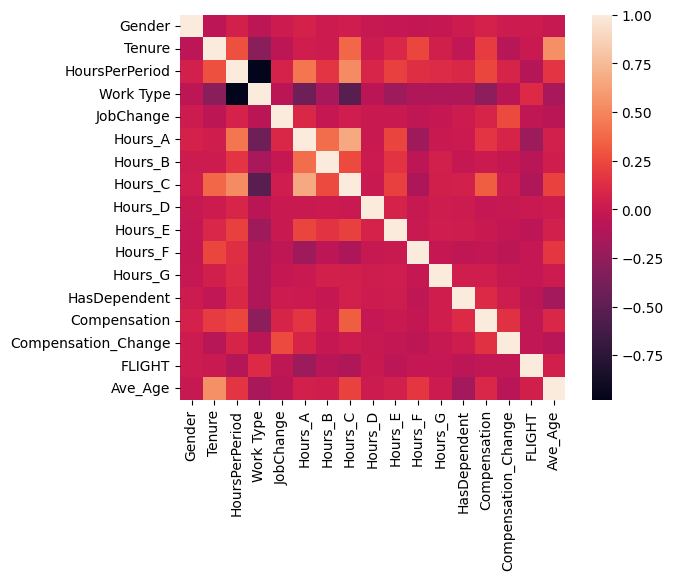

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, square=True)


<ipython-input-60-d8d3019ed7d8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_df.corr()


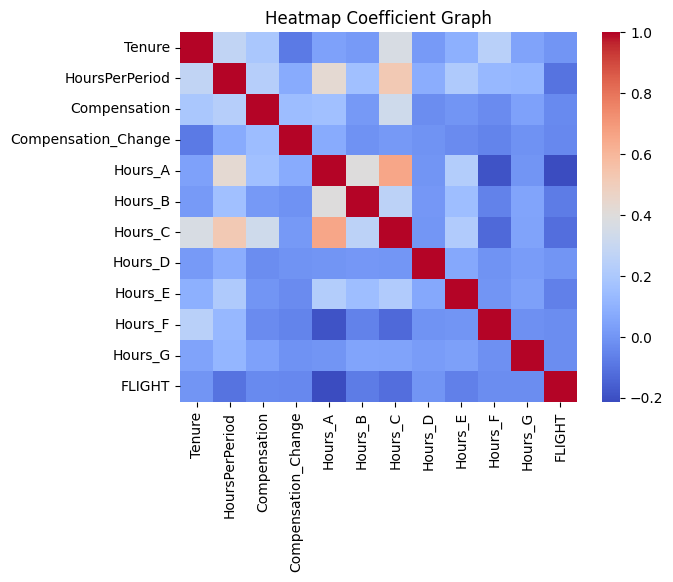

In [ ]:
new_df = df[['Age Group','Tenure', 'HoursPerPeriod', 'Compensation', 'Compensation_Change', 'Hours_A', 'Hours_B' , 'Hours_C','Hours_D','Hours_E','Hours_F','Hours_G','FLIGHT'
]].copy()

correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Heatmap Coefficient Graph")
plt.show()

### pair plots

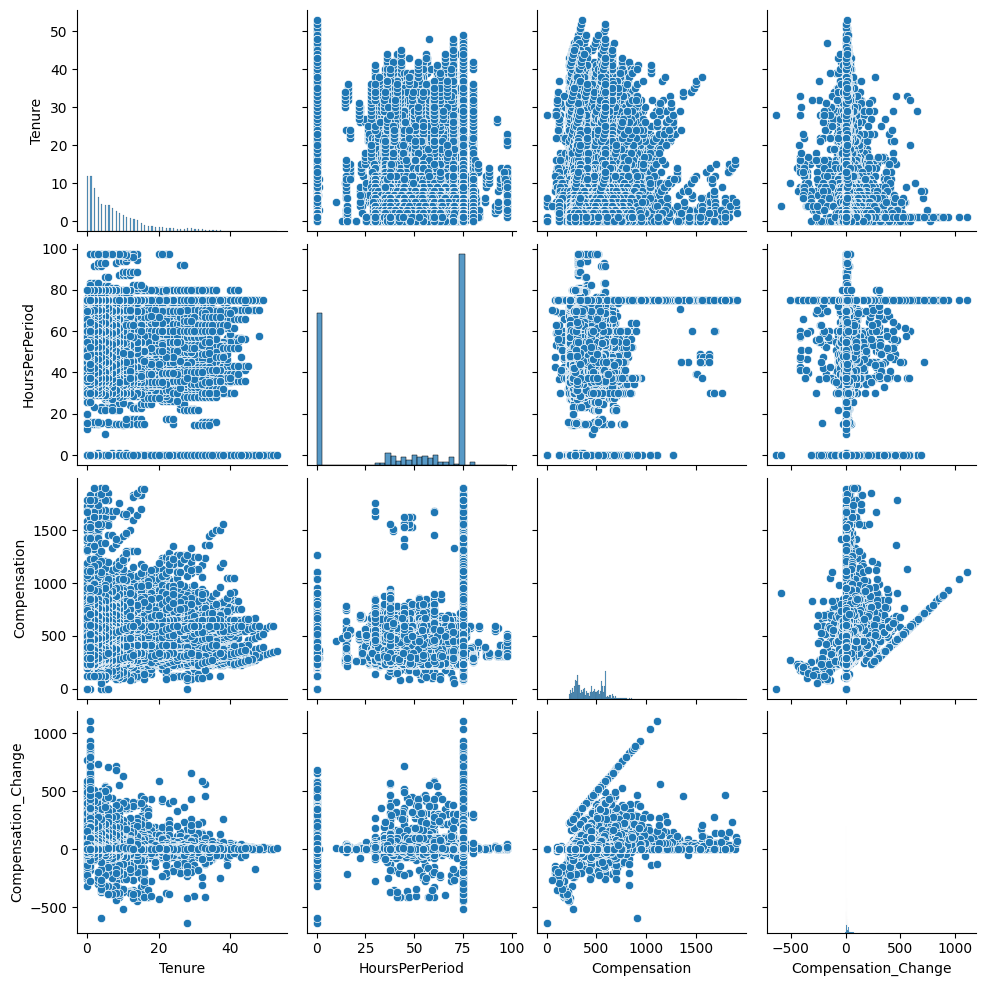

In [ ]:
variables = ['Age Group', 'Tenure', 'HoursPerPeriod' , 'Compensation', 'Compensation_Change']

# Create pair plots
sns.pairplot(df[variables])
plt.show()

##

### Categorical — Categorical Analysis

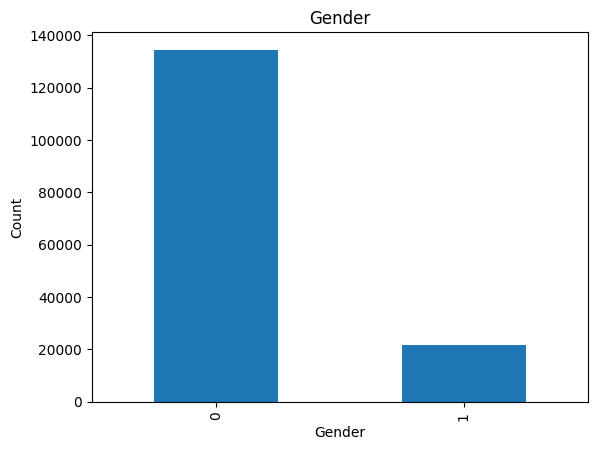

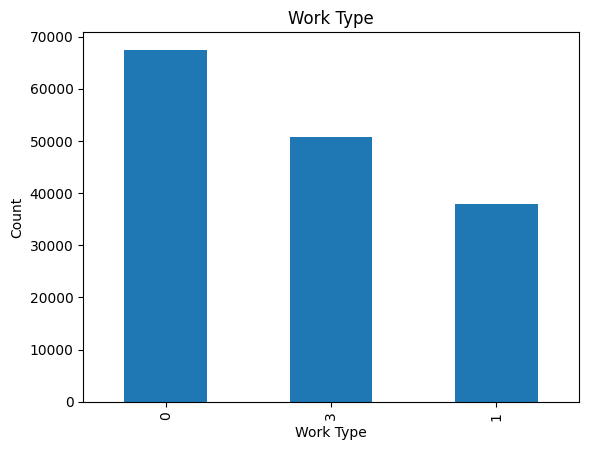

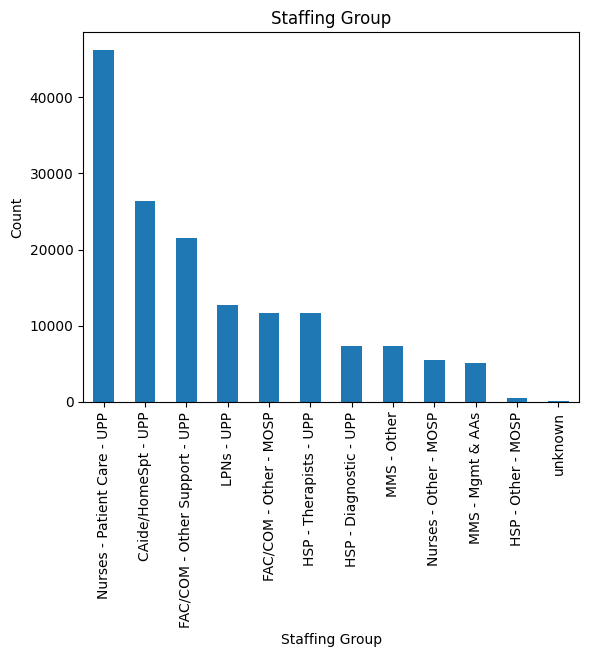

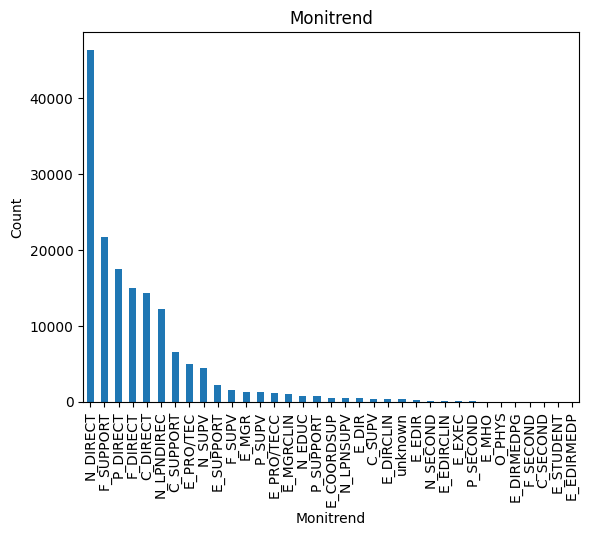

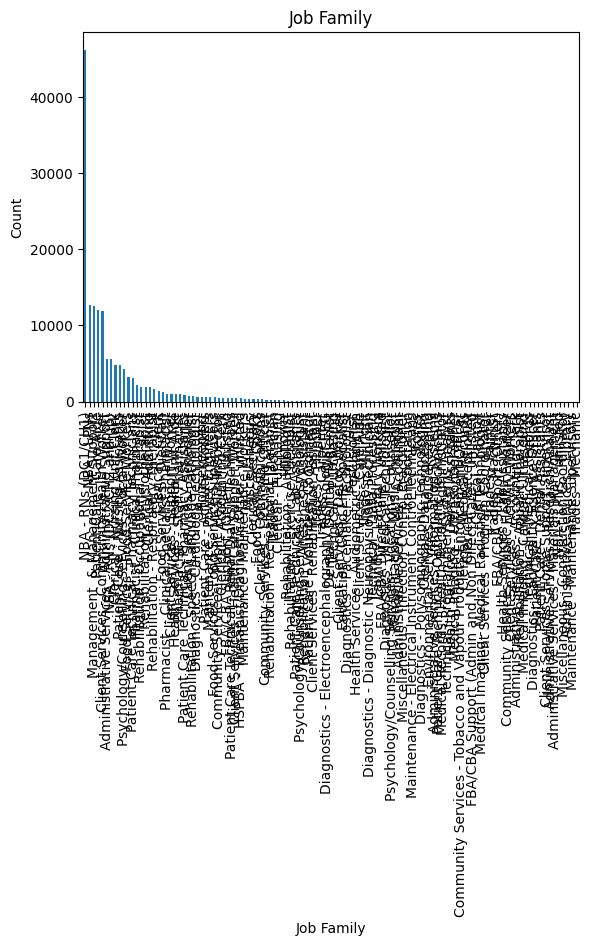

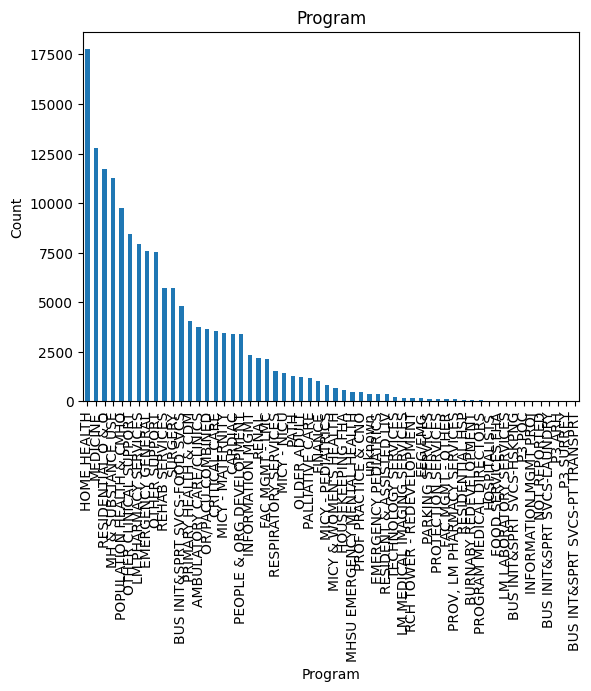

In [ ]:
variables = ['Gender', 'Work Type',  'Staffing Group','Monitrend' , 'Job Family','Program']
temp = df[variables]
# Generate a graph for each column
for column in temp.columns:
    plt.figure()
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Encoding Categorical Features

In [ ]:
categorical_features = df.select_dtypes(include=['object'])
unique_counts = categorical_features.nunique()
print("Number of unique values in each categorical feature:")
print(unique_counts)

Number of unique values in each categorical feature:
Age Group             16
Designated Group       6
Union                 12
Site                 177
WorkCity              26
Staffing Group        12
Monitrend             35
Job Family           115
Program               58
JobCodeGrade         193
Dept                1760
dtype: int64


Based on the number of unique value, we decided to use One-Hot encoding method for feature 'Designated Group', and use Frequency or Count Encoding Method for other features.



In [ ]:
# One-hot encoding
import pandas as pd
encoded_data = pd.get_dummies(df['Work Type'], prefix='WorkType', prefix_sep='_')
df_encoded = pd.concat([df, encoded_data], axis=1)
print(df_encoded.head())

      ID  Identifier  Snapshot Year Age Group  Gender  Tenure  HoursPerPeriod  \
0  32018           3           2018     30-35       0       3             0.0   
1  32019           3           2019     30-35       0       4            75.0   
2  32020           3           2020     30-35       0       5            75.0   
3  32021           3           2021     30-35       0       6             0.0   
4  32022           3           2022     35-40       0       7             0.0   

   Work Type Designated Group Union  ... Hours_G HasDependent            Dept  \
0          3                N     B  ...     0.0          0.0  310.71.2922012   
1          0                N     B  ...     0.0          0.0  310.71.2101020   
2          0                N     B  ...     0.0          0.0  310.71.2101020   
3          3                N     B  ...     0.0          0.0  310.71.2101020   
4          3                N     B  ...     0.0          0.0  310.71.2101020   

  Compensation Compensatio

In [ ]:
# One-hot encoding
import pandas as pd
encoded_data = pd.get_dummies(df_encoded['Designated Group'], prefix='DesignatedGroup ', prefix_sep='_')
df_encoded = pd.concat([df_encoded, encoded_data], axis=1)
print(df_encoded.head())

      ID  Identifier  Snapshot Year Age Group  Gender  Tenure  HoursPerPeriod  \
0  32018           3           2018     30-35       0       3             0.0   
1  32019           3           2019     30-35       0       4            75.0   
2  32020           3           2020     30-35       0       5            75.0   
3  32021           3           2021     30-35       0       6             0.0   
4  32022           3           2022     35-40       0       7             0.0   

   Work Type Designated Group Union  ... Ave_Age WorkType_0 WorkType_1  \
0          3                N     B  ...      32          0          0   
1          0                N     B  ...      32          1          0   
2          0                N     B  ...      32          1          0   
3          3                N     B  ...      32          0          0   
4          3                N     B  ...      37          0          0   

  WorkType_3 DesignatedGroup _C DesignatedGroup _E  DesignatedGroup 

In [ ]:
# Count Encoding
categorical_vars = ['Union', 'Site', 'WorkCity', 'Staffing Group', 'Monitrend', 'Job Family', 'Program', 'JobCodeGrade', 'Dept']
# Count Encoding function
def count_encoding(df, column):
    count_map = df[column].value_counts().to_dict()
    df[column + '_count_encoded'] = df[column].map(count_map)

# Applying Count Encoding to each categorical variable
for var in categorical_vars:
    count_encoding(df_encoded, var)

for var in categorical_vars:
    df_encoded[var + '_count_encoded'] = pd.to_numeric(df_encoded[var + '_count_encoded'], errors='coerce')
encoded_vars = [var + '_count_encoded' for var in categorical_vars]
print(df_encoded[encoded_vars].dtypes)
print(df_encoded.head())

Union_count_encoded             int64
Site_count_encoded              int64
WorkCity_count_encoded          int64
Staffing Group_count_encoded    int64
Monitrend_count_encoded         int64
Job Family_count_encoded        int64
Program_count_encoded           int64
JobCodeGrade_count_encoded      int64
Dept_count_encoded              int64
dtype: object
      ID  Identifier  Snapshot Year Age Group  Gender  Tenure  HoursPerPeriod  \
0  32018           3           2018     30-35       0       3             0.0   
1  32019           3           2019     30-35       0       4            75.0   
2  32020           3           2020     30-35       0       5            75.0   
3  32021           3           2021     30-35       0       6             0.0   
4  32022           3           2022     35-40       0       7             0.0   

   Work Type Designated Group Union  ... DesignatedGroup _P  \
0          3                N     B  ...                  0   
1          0                N  

In [ ]:
df_new = df.drop(['ID', 'Identifier','Snapshot Year'], axis=1)
corr = df_new.corr()
# Extract correlation values for the "Flight" column and drop the 'Flight' itself to avoid self-correlation
flight_corr = corr['FLIGHT'].drop('FLIGHT')

# Rank variables based on their absolute correlation with "Flight"
ranked_corr = flight_corr.abs().sort_values(ascending=False)
ranked_df = ranked_corr.reset_index()
ranked_df.columns = ['Variable', 'Absolute Correlation with Flight']

# Display
print(ranked_df)

<ipython-input-123-e9162c8e5154>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_new.corr()


               Variable  Absolute Correlation with Flight
0               Hours_A                          0.213017
1               Hours_C                          0.118041
2             Work Type                          0.104587
3        HoursPerPeriod                          0.103268
4               Hours_B                          0.079138
5          HasDependent                          0.064278
6               Hours_E                          0.061934
7               Ave_Age                          0.048969
8             JobChange                          0.046300
9   Compensation_Change                          0.041575
10         Compensation                          0.037563
11              Hours_G                          0.027721
12              Hours_F                          0.024030
13               Gender                          0.016348
14              Hours_D                          0.003506
15               Tenure                          0.003009


In [ ]:
df=df_encoded

# Extra Exploration

In [ ]:
df['FLIGHT'] = df['FLIGHT'].astype(float)

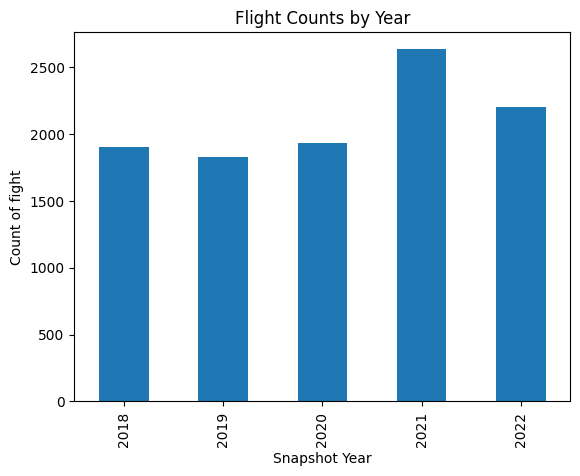

In [ ]:

# importing pandas library
import pandas as pd
# import matplotlib library
import matplotlib.pyplot as plt
df['FLIGHT'] = df['FLIGHT'].astype(float)
grouped_df = df.groupby('Snapshot Year')['FLIGHT'].sum()
grouped_df.plot(kind='bar', stacked=True)
plt.xlabel('Snapshot Year')
plt.ylabel('Count of fight')
plt.title('Flight Counts by Year')
plt.show()

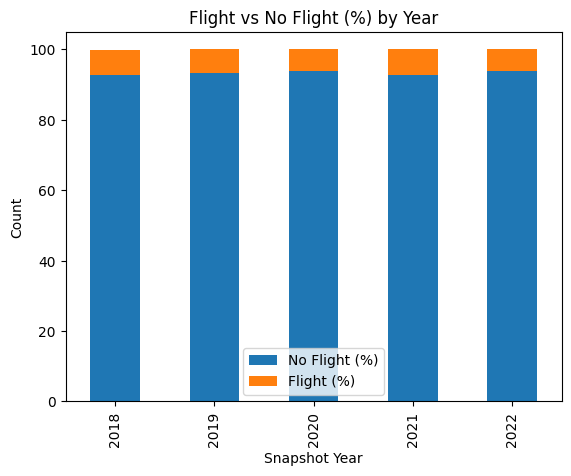

In [ ]:
grouped_df = df.groupby('Snapshot Year')['FLIGHT'].value_counts().unstack().fillna(0)

grouped_df['No Flight (%)'] = (grouped_df[0] / grouped_df.sum(axis=1)) * 100
grouped_df['Flight (%)'] = (grouped_df[1] / grouped_df.sum(axis=1)) * 100
grouped_df[['No Flight (%)', 'Flight (%)']].plot(kind='bar', stacked=True)
plt.xlabel('Snapshot Year')
plt.ylabel('Count')
plt.title('Flight vs No Flight (%) by Year')
plt.legend(['No Flight (%)', 'Flight (%)'])
plt.show()

In [ ]:
#From 2018 to 2022, the fligth rates are the same. It would not be bias if we look deep on only 2022 as current snap period.

In [ ]:
df2022 = df[df['Snapshot Year'] == 2022]

In [ ]:
df2022.head()

,ID,Identifier,Snapshot Year,Age Group,Gender,Tenure,HoursPerPeriod,Work Type,Designated Group,Union,...,DesignatedGroup _P,Union_count_encoded,Site_count_encoded,WorkCity_count_encoded,Staffing Group_count_encoded,Monitrend_count_encoded,Job Family_count_encoded,Program_count_encoded,JobCodeGrade_count_encoded,Dept_count_encoded
4,32022,3,2022,35-40,0,7,0.0,3,N,B,...,0,62983,2313,2893,12697,12193,12694,1283,12047,140
6,42022,4,2022,25-30,0,1,75.0,0,N,B,...,0,62983,944,15090,46213,46380,46213,17754,46224,313
8,52022,5,2022,35-40,0,1,0.0,3,F,H,...,0,57957,5130,8078,26393,14951,12088,12777,12746,420
10,72022,7,2022,45-50,0,1,75.0,0,C,G,...,0,19065,373,7924,11638,6519,5656,11270,1554,46
12,82022,8,2022,20-25,0,1,0.0,3,N,B,...,0,62983,7698,12905,12697,12193,12694,5704,12047,348


<ipython-input-73-8773aa3e407a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_df.corr()


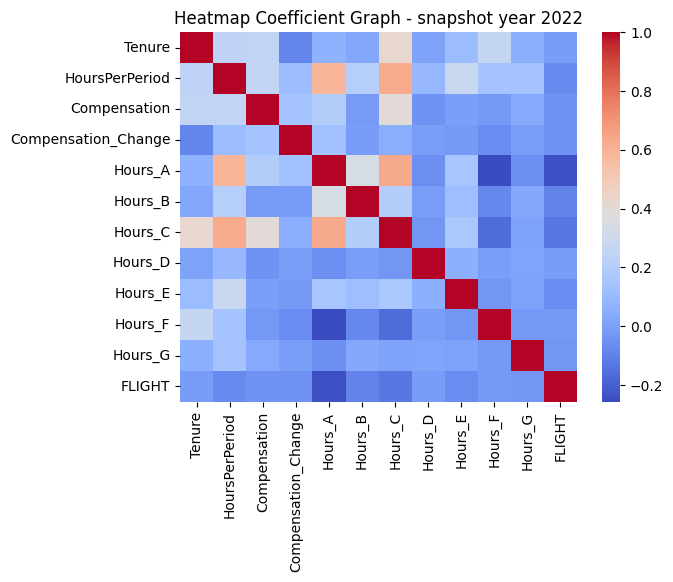

In [ ]:
new_df = df2022[['Age Group','Tenure', 'HoursPerPeriod', 'Compensation', 'Compensation_Change', 'Hours_A', 'Hours_B' , 'Hours_C','Hours_D','Hours_E','Hours_F','Hours_G','FLIGHT'
]].copy()

correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Heatmap Coefficient Graph - snapshot year 2022")
plt.show()
#do we required to normalize the data?

# Modeling

##Decision Tree



Train Model for whole dataset

In [ ]:
from sklearn.model_selection import train_test_split
temp = df['Identifier']
temp = temp.unique()
train_data, test_data = train_test_split(temp, test_size=0.15, random_state=42)
train_data = pd.DataFrame({ 'Identifier': train_data})
test_data = pd.DataFrame({ 'Identifier': test_data})

# Perform the equivalent of "SELECT * FROM df WHERE Identifier IN (SELECT Identifier FROM train_data)"
train_data = df[df['Identifier'].isin(train_data['Identifier'])]
test_data  = df[df['Identifier'].isin(test_data['Identifier'])]
print(train_data.shape)
print(test_data.shape)

(132756, 49)
(23419, 49)


In [ ]:
X = train_data.select_dtypes(include=['number'])
X_train = X.loc[:, ~X.columns.isin(['FLIGHT', 'Age Group', 'ID','Identifier'])]
y_train = train_data['FLIGHT']

X = test_data.select_dtypes(include=['number'])
X_test = X.loc[:, ~X.columns.isin(['FLIGHT', 'Age Group', 'ID','Identifier'])]
y_test = test_data['FLIGHT']
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In the following plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node.



Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

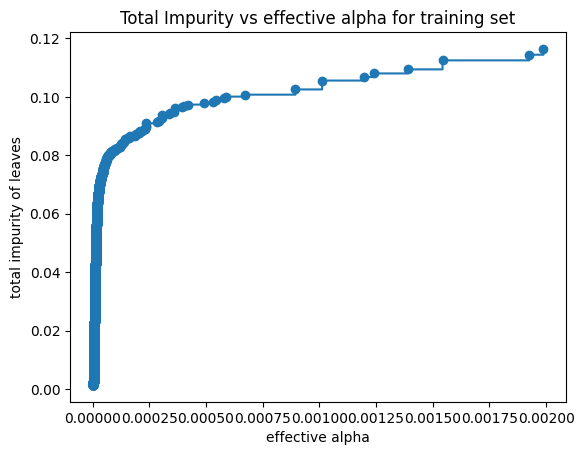

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Rebuild the model with ccp_alpha = 0.001

In [ ]:
from sklearn.metrics import accuracy_score
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.9278790725479311

In [ ]:
clf = DecisionTreeClassifier(ccp_alpha=0.00075)
clf = clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9360348435031385

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[21729,    86],
       [ 1412,   192]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.94      1.00      0.97     21815
      benign       0.69      0.12      0.20      1604

    accuracy                           0.94     23419
   macro avg       0.81      0.56      0.59     23419
weighted avg       0.92      0.94      0.91     23419



In [ ]:
feature_names = X_train.columns

In [ ]:
feature_importance=clf.feature_importances_

In [ ]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
Hours_A,0.451598
Ave_Age,0.125707
Snapshot Year,0.118395
Hours_F,0.079937
Compensation_Change,0.071591
DesignatedGroup _F,0.060314
Tenure,0.051584
HoursPerPeriod,0.040875
Program_count_encoded,0.000000
Job Family_count_encoded,0.000000


In [ ]:
features = list(feature_importance[feature_importance[0]>0].index)

<Axes: >

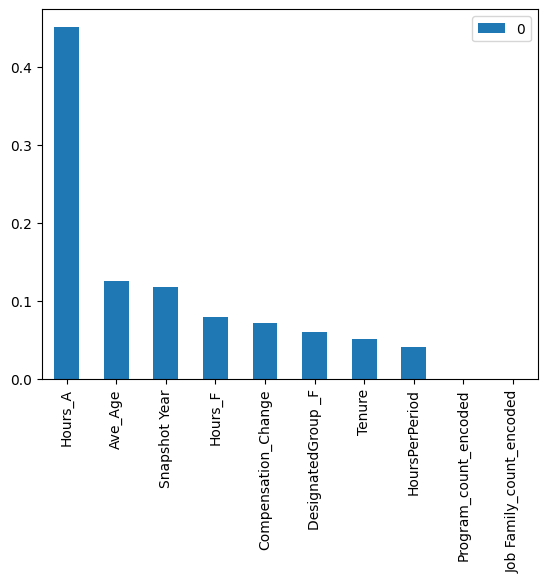

In [ ]:
feature_importance.head(10).plot(kind='bar')

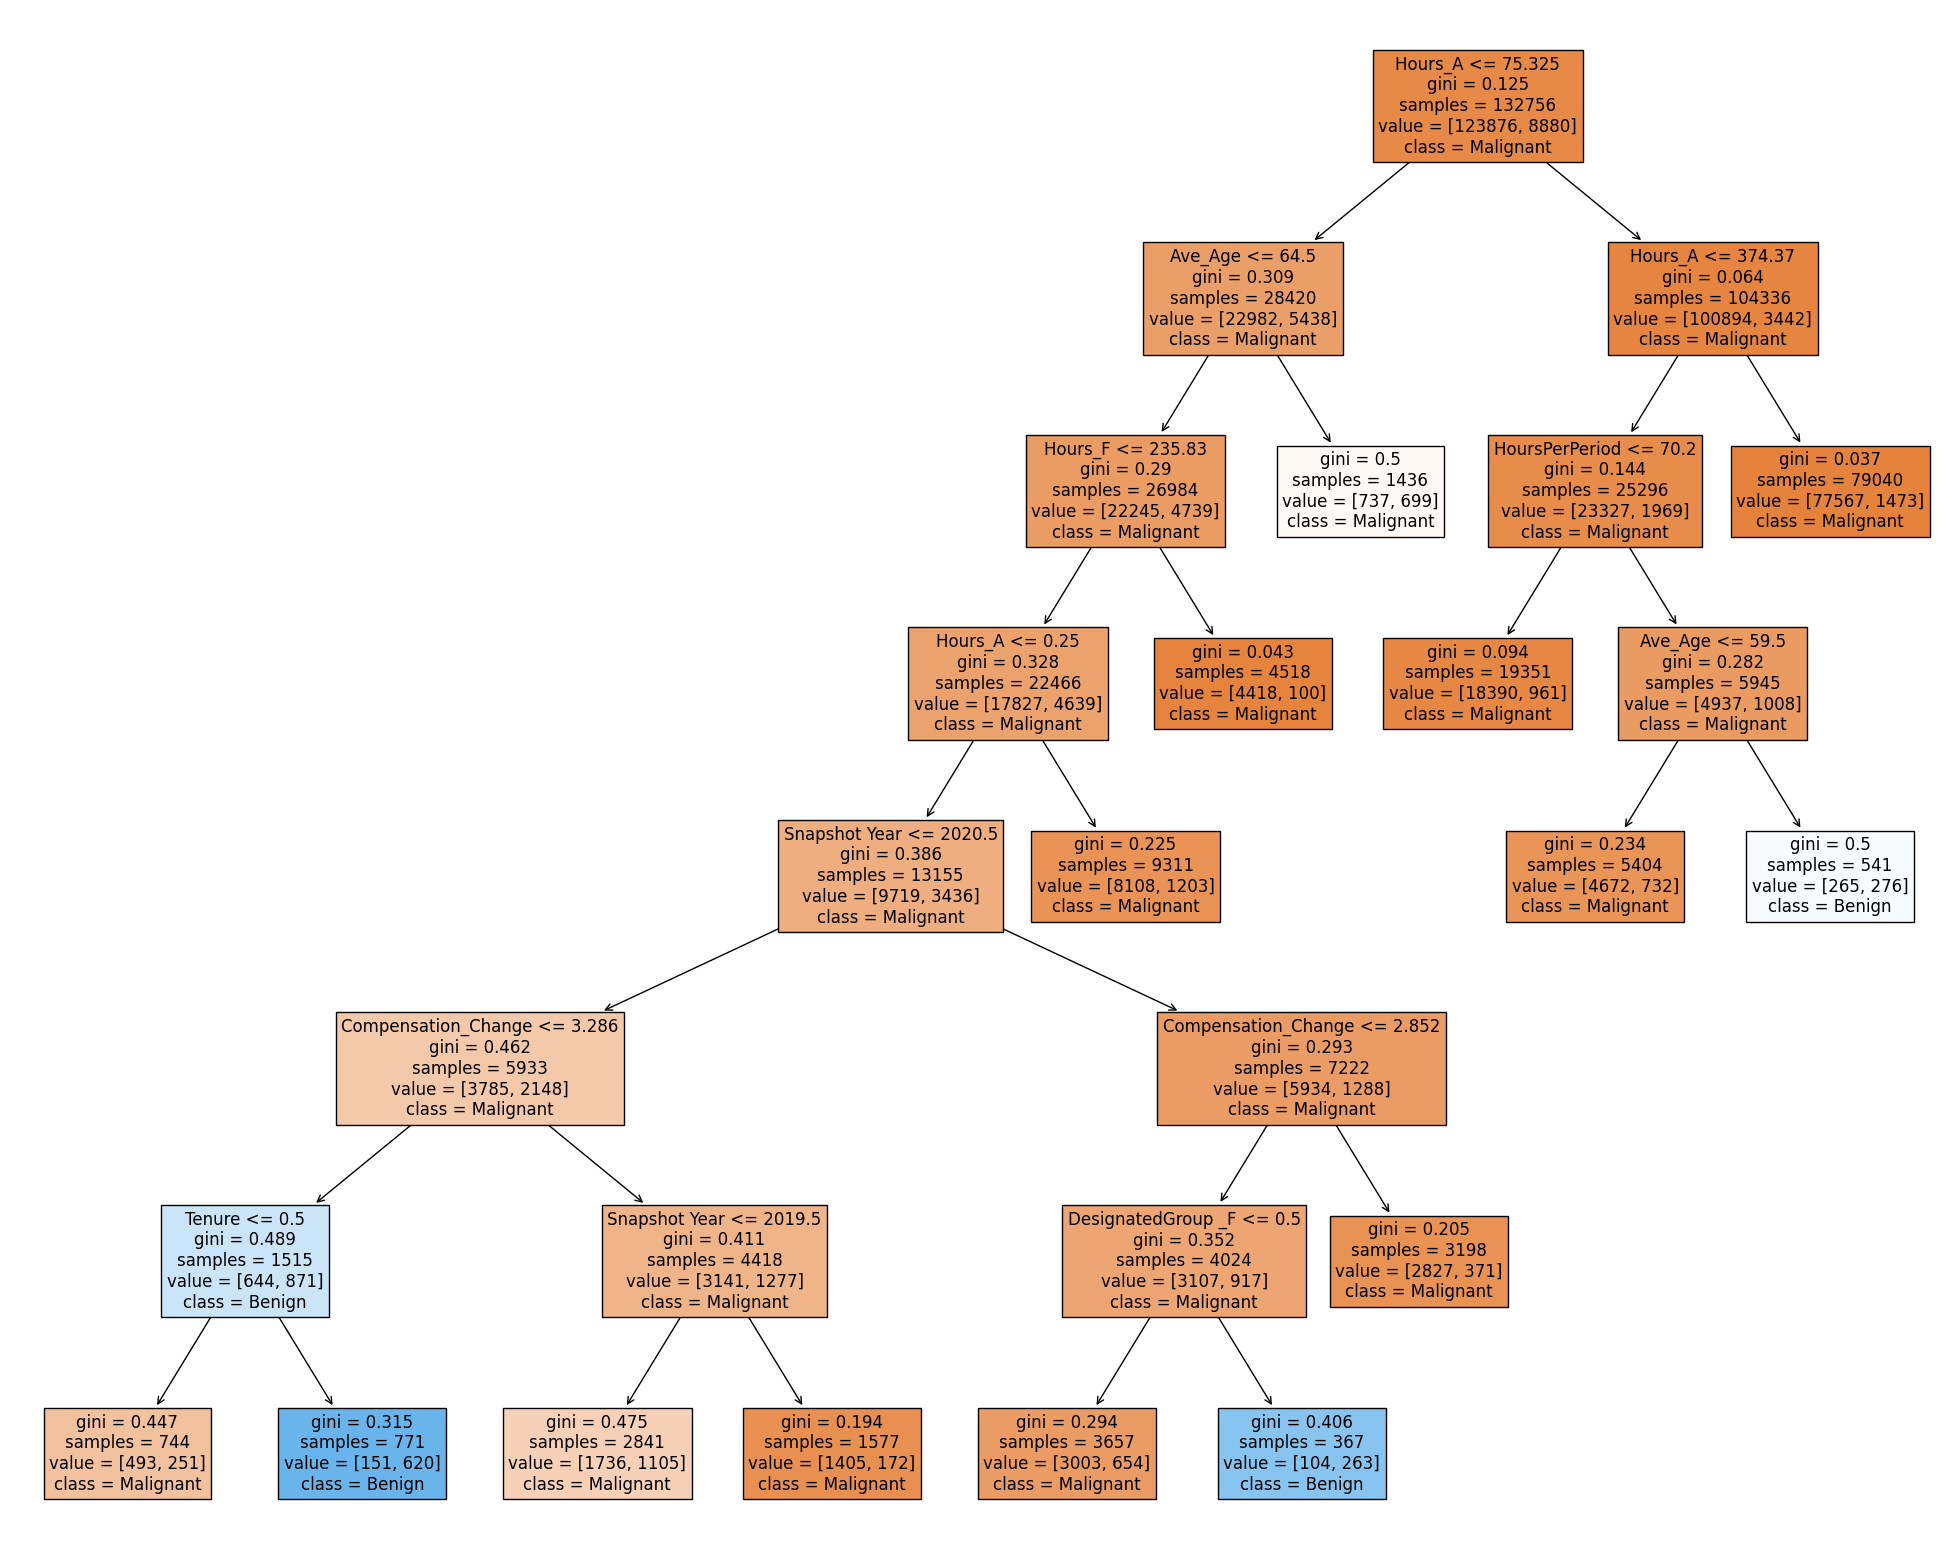

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names={0:'Malignant', 1:'Benign'},
                   filled=True,
                  fontsize=12)

## Logistic Regression

   Snapshot Year  Gender  Tenure  HoursPerPeriod  Work Type  JobChange  \
0           2018       0       3             0.0          3        0.0   
1           2019       0       4            75.0          0        0.0   
2           2020       0       5            75.0          0        0.0   
3           2021       0       6             0.0          3        0.0   
4           2022       0       7             0.0          3        0.0   

   Hours_A  Hours_B  Hours_C  Hours_D  ...  DesignatedGroup _P  \
0    346.0     0.00      0.0      0.0  ...                   0   
1    682.0     8.42     33.0      0.0  ...                   0   
2    512.5    19.92     88.0      0.0  ...                   0   
3    781.0    57.42     66.0      0.0  ...                   0   
4      0.0     0.00      0.0      0.0  ...                   0   

   Union_count_encoded  Site_count_encoded  WorkCity_count_encoded  \
0                62983                2313                    2893   
1                6

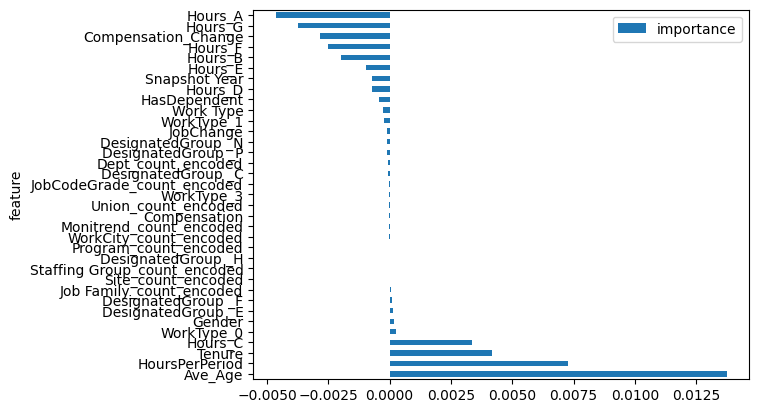

In [ ]:
#logistic
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
print(X_train[0:5])
X_test
LR = LogisticRegression(solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
print("Train set Accuracy: ", accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))


w = LR.coef_[0]
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
import math

feature_importance["importance"] = w
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)

ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(LogisticRegression(C=1,solver='liblinear', penalty='l1'))
sel_.fit(X_train, y_train)
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False,  True, False,  True])

## Random Forest

Train set Accuracy:  0.9348202717767935
Test set Accuracy:  0.9328323156411461
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     21815
           1       0.94      0.02      0.04      1604

    accuracy                           0.93     23419
   macro avg       0.94      0.51      0.50     23419
weighted avg       0.93      0.93      0.90     23419



<Axes: >

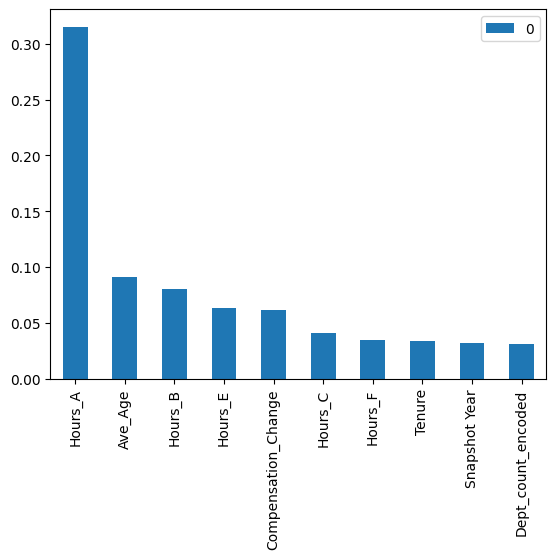

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=7)
rf.fit(X_train, y_train)
yhat = rf.predict(X_test)
print("Train set Accuracy: ", accuracy_score(y_train, rf.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))
print(classification_report(y_test, yhat))


rf.feature_importances_
feature_importance = pd.DataFrame(rf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance.head(10).plot(kind='bar')

## KNN

In [ ]:
#Try KNN
'''featurenames =['Ave_Age','Tenure', 'HoursPerPeriod', 'Compensation', 'Compensation_Change', 'Hours_A'
]
X = df[featurenames] .values

from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train).transform(X.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X.astype(float))'''
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

Train set Accuracy:  0.942413148934888
Test set Accuracy:  0.930227592980059
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     21815
           1       0.45      0.09      0.14      1604

    accuracy                           0.93     23419
   macro avg       0.69      0.54      0.55     23419
weighted avg       0.90      0.93      0.91     23419



In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.90195995, 0.92954439, 0.92194372, 0.93022759, 0.92749477,
       0.9308254 , 0.92924548, 0.93044109, 0.92984329])

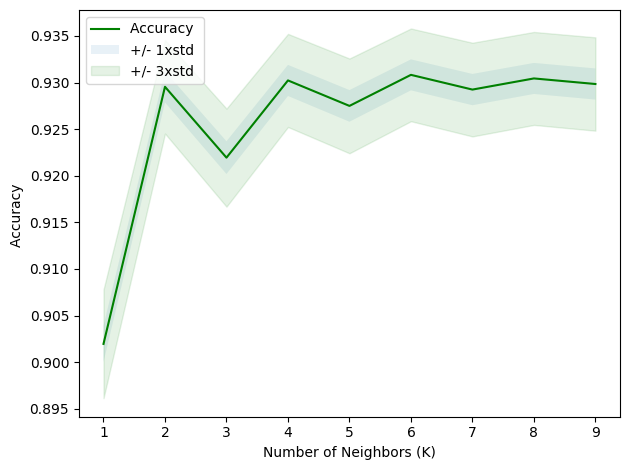

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

## Feature Selection

In [ ]:
feature_names =['Ave_Age','Tenure', 'HoursPerPeriod', 'Compensation_Change', 'Hours_A','Snapshot Year']
X_train = train_data[feature_names]
y_train = train_data['FLIGHT']

X_test = test_data[feature_names]
y_test = test_data['FLIGHT']

## Decision Tree -2

In [ ]:
#Decision tree

In [ ]:
clf = DecisionTreeClassifier(ccp_alpha=0.00075)
clf = clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.9339425252999701

In [ ]:
def specificity_npv(y_true, y_pred):
    # Generate confusion matrix
    fp, tn, tp, fn = confusion_matrix(y_true, y_pred).ravel()

    # Compute Specificity (True Negative Rate, TNR)
    tnr = tn / (tn + fp)

    # Compute Negative Predictive Value (NPV)
    npv = tn / (tn + fn)

    return tnr, npv

yhat = predictions
tnr, npv = specificity_npv(y_test, yhat)
print(f"Specificity (TNR): {tnr:.4f}")
print(f"Negative Predictive Value (NPV): {npv:.4f}")

Specificity (TNR): 0.0088
Negative Predictive Value (NPV): 0.4354


## Logistic Regression -2

Train set Accuracy:  0.9331103678929766
Test set Accuracy:  0.9315086041248559
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     21815
           1       0.00      0.00      0.00      1604

    accuracy                           0.93     23419
   macro avg       0.47      0.50      0.48     23419
weighted avg       0.87      0.93      0.90     23419



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


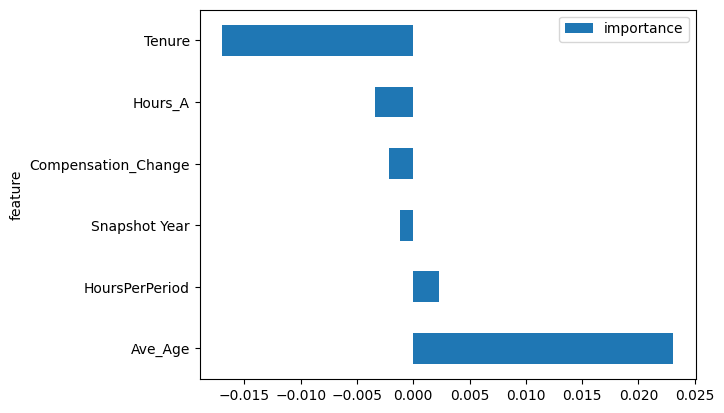

In [ ]:
LR = LogisticRegression(solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
print("Train set Accuracy: ", accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))


w = LR.coef_[0]
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
import math

feature_importance["importance"] = w
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)

ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

In [ ]:
yhat = yhat
def specificity_npv(y_true, y_pred):
    # Generate confusion matrix
    fp, tn, tp, fn = confusion_matrix(y_true, y_pred).ravel()

    # Compute Specificity (True Negative Rate, TNR)
    tnr = tn / (tn + fp)

    # Compute Negative Predictive Value (NPV)
    npv = tn / (tn + fn)

    return tnr, npv

tnr, npv = specificity_npv(y_test, yhat)
print(f"Specificity (TNR): {tnr:.4f}")
print(f"Negative Predictive Value (NPV): {npv:.4f}")

Specificity (TNR): 0.0000
Negative Predictive Value (NPV): nan


<ipython-input-163-40fdc85684b8>:10: RuntimeWarning: invalid value encountered in long_scalars
  npv = tn / (tn + fn)


## RandomForest -2

Train set Accuracy:  0.9450420319985537
Test set Accuracy:  0.9406037832529143
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     21815
           1       0.76      0.19      0.31      1604

    accuracy                           0.94     23419
   macro avg       0.85      0.59      0.64     23419
weighted avg       0.93      0.94      0.92     23419



<Axes: >

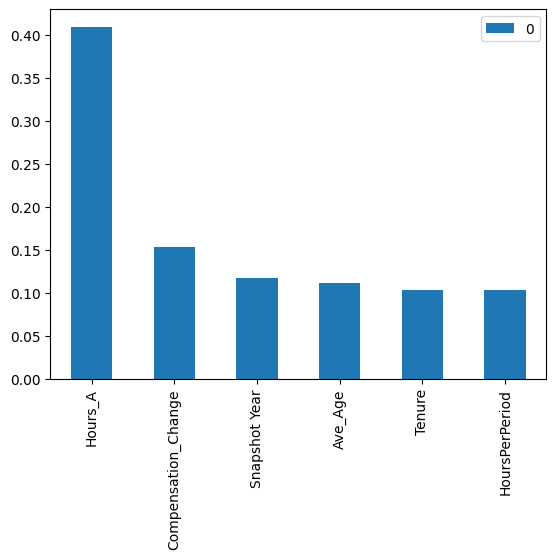

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth= 10)
rf.fit(X_train, y_train)
yhat = rf.predict(X_test)
print("Train set Accuracy: ", accuracy_score(y_train, rf.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))
print(classification_report(y_test, yhat))


rf.feature_importances_
feature_importance = pd.DataFrame(rf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance.head(10).plot(kind='bar')

In [ ]:
yhat = yhat
def specificity_npv(y_true, y_pred):
    # Generate confusion matrix
    fp, tn, tp, fn = confusion_matrix(y_true, y_pred).ravel()

    # Compute Specificity (True Negative Rate, TNR)
    tnr = tn / (tn + fp)

    # Compute Negative Predictive Value (NPV)
    npv = tn / (tn + fn)

    return tnr, npv

tnr, npv = specificity_npv(y_test, yhat)
print(f"Specificity (TNR): {tnr:.4f}")
print(f"Negative Predictive Value (NPV): {npv:.4f}")

Specificity (TNR): 0.0044
Negative Predictive Value (NPV): 0.2357


## KNN -2

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.90669969, 0.93419873, 0.92971519, 0.93518084, 0.93394253,
       0.93624835, 0.93569324, 0.93735856, 0.93650455])

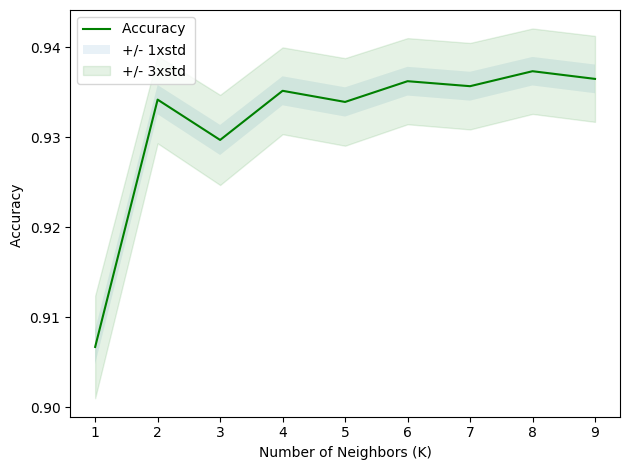

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
yhat = yhat
def specificity_npv(y_true, y_pred):
    # Generate confusion matrix
    fp, tn, tp, fn = confusion_matrix(y_true, y_pred).ravel()

    # Compute Specificity (True Negative Rate, TNR)
    tnr = tn / (tn + fp)

    # Compute Negative Predictive Value (NPV)
    npv = tn / (tn + fn)

    return tnr, npv

tnr, npv = specificity_npv(y_test, yhat)
print(f"Specificity (TNR): {tnr:.4f}")
print(f"Negative Predictive Value (NPV): {npv:.4f}")

Specificity (TNR): 0.0099
Negative Predictive Value (NPV): 0.3938


## Neural Network

In [ ]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[len(feature_names)]),
    tf.keras.layers.Dense(50, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(50, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics="accuracy")
history = model.fit(X_train, y_train, batch_size=32, epochs=100,
                    validation_data=(X_test, y_test))

Epoch 1/100
4149/4149 [==============================] - 18s 4ms/step - loss: 0.2386 - accuracy: 0.9314 - val_loss: 0.2095 - val_accuracy: 0.9315
Epoch 2/100
4149/4149 [==============================] - 12s 3ms/step - loss: 0.2079 - accuracy: 0.9331 - val_loss: 0.2095 - val_accuracy: 0.9315
Epoch 3/100
4149/4149 [==============================] - 12s 3ms/step - loss: 0.2056 - accuracy: 0.9331 - val_loss: 0.2045 - val_accuracy: 0.9315
Epoch 4/100
4149/4149 [==============================] - 11s 3ms/step - loss: 0.2047 - accuracy: 0.9330 - val_loss: 0.2051 - val_accuracy: 0.9315
Epoch 5/100
4149/4149 [==============================] - 16s 4ms/step - loss: 0.2045 - accuracy: 0.9331 - val_loss: 0.2050 - val_accuracy: 0.9315
Epoch 6/100
4149/4149 [==============================] - 13s 3ms/step - loss: 0.2033 - accuracy: 0.9331 - val_loss: 0.2029 - val_accuracy: 0.9315
Epoch 7/100
4149/4149 [==============================] - 11s 3ms/step - loss: 0.2034 - accuracy: 0.9331 - val_loss: 0.2033 -

In [ ]:
yhat = yhat
def specificity_npv(y_true, y_pred):
    # Generate confusion matrix
    fp, tn, tp, fn = confusion_matrix(y_true, y_pred).ravel()

    # Compute Specificity (True Negative Rate, TNR)
    tnr = tn / (tn + fp)

    # Compute Negative Predictive Value (NPV)
    npv = tn / (tn + fn)

    return tnr, npv

tnr, npv = specificity_npv(y_test, yhat)
print(f"Specificity (TNR): {tnr:.4f}")
print(f"Negative Predictive Value (NPV): {npv:.4f}")

#Extra Model for imbalanced dataset


## Isolation Forest

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
# Training the Isolation Forest Model
clf = IsolationForest(contamination=float(y_train.sum())/len(y_train), random_state=42)  # Setting the contamination to the ratio of positive samples in training set.
clf.fit(X_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Convert -1 to 1 and 1 to 0 to match the 'FLIGHT' target variable
y_train_pred = (y_train_pred == -1).astype(int)
y_test_pred = (y_test_pred == -1).astype(int)

from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Train accuracy: 0.8803
Test accuracy: 0.8814


## One-class SVM model

In [ ]:
# Preparing Data:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Training the One-Class SVM:
from sklearn.svm import OneClassSVM

# Here, we can set nu close to the proportion of anomalies in the dataset.
nu = float(y_train.sum()) / len(y_train)
clf = OneClassSVM(nu=nu, kernel="rbf", gamma='scale')
clf.fit(X_train_scaled)

OneClassSVM(nu=0.06688963210702341)

In [ ]:
#Making Predictions:
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

# Convert -1 to 1 and 1 to 0 to match the 'FLIGHT' target variable
y_train_pred = (y_train_pred == -1).astype(int)
y_test_pred = (y_test_pred == -1).astype(int)

In [ ]:
#Evaluate Model Accuracy:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 0.8787
Test accuracy: 0.8767


## Gradient Boosting Machines

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [ ]:
# Define and train the model
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,  # To avoid a warning related to deprecation in newer versions of XGBoost
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])  # Handle class imbalance
)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 0.8279
Test accuracy: 0.8158


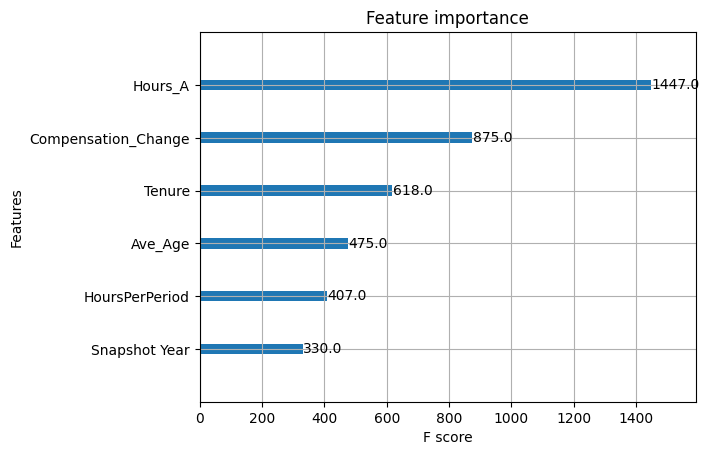

In [ ]:
import matplotlib.pyplot as plt

# Plotting feature importances
xgb.plot_importance(model)
plt.show()

# Method to increase the accuracy

## Undersampling

In [ ]:
# Undersampling the Majority Class:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(17760, 6)
(17760,)


Train set Accuracy:  0.777759009009009
Test set Accuracy:  0.7428156624962637
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     21815
           1       0.18      0.81      0.30      1604

    accuracy                           0.74     23419
   macro avg       0.58      0.77      0.57     23419
weighted avg       0.93      0.74      0.81     23419



<Axes: >

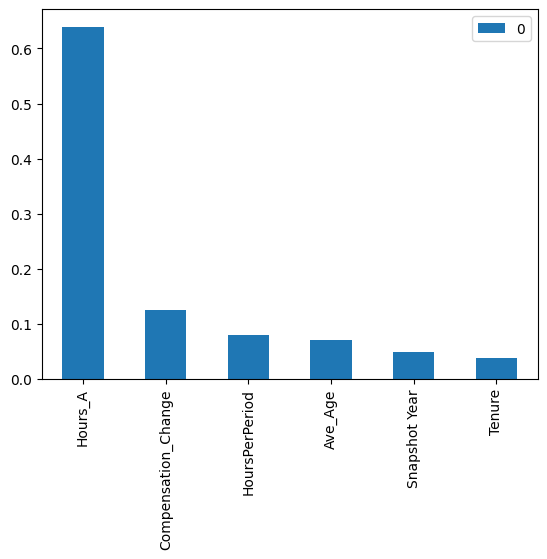

In [ ]:
#random forrest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train_resampled, y_train_resampled)
yhat = rf.predict(X_test)
print("Train set Accuracy: ", accuracy_score(y_train_resampled, rf.predict(X_train_resampled)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))
print(classification_report(y_test, yhat))


rf.feature_importances_
feature_importance = pd.DataFrame(rf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance.head(10).plot(kind='bar')